In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats


In [149]:
#import de packages
df=pd.read_excel("/Users/abbasmzehamadi/Downloads/USDA_National_Nutrient_DataBase.xlsx")
df.head()

NDB_No               Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001        BUTTER,WITH SALT      15.87         717         0.85   
1    1002  BUTTER,WHIPPED,W/ SALT      16.72         718         0.49   
2    1003    BUTTER OIL,ANHYDROUS       0.24         876         0.28   
3    1004             CHEESE,BLUE      42.41         353        21.40   
4    1005            CHEESE,BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  ...  \
0          81.11     2.11            0.06           0.0           0.06  ...   
1          78.30     1.62            2.87           0.0           0.06  ...   
2          99.48     0.00            0.00           0.0           0.00  ...   
3          28.74     5.11            2.34           0.0           0.50  ...   
4          29.68     3.18            2.79           0.0           0.51  ...   

   Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  GmWt_1  \
0         7.0      51.368       21.021        3.043           215.0    5.00   
1         4.6      45.390       19.874        3.331           225.0    3.80   
2         8.6      61.924       28.732        3.694           256.0   12.80   
3         2.4      18.669        7.778        0.800            75.0   28.35   
4         2.5      18.764        8.598        0.784            94.0  132.00   

                   GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  
0  1 pat,  (1" sq, 1/3" high)    14.2           1 tbsp         0.0  
1  1 pat,  (1" sq, 1/3" high)     9.4           1 tbsp         0.0  
2                      1 tbsp   205.0            1 cup         0.0  
3                        1 oz    17.0     1 cubic inch         0.0  
4                1 cup, diced   113.0  1 cup, shredded         0.0  

[5 rows x 53 columns]

In [150]:
#Changement d'index
df=df.set_index('NDB_No')

In [151]:
df.shape

(8790, 52)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 1001 to 93600
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Shrt_Desc          8790 non-null   object 
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 n

In [153]:
df.dtypes

Shrt_Desc             object
Water_(g)            float64
Energ_Kcal             int64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
Vit_A_RAE            float64
Retinol_(µg)         float64
Alpha_Carot_(µ

In [154]:
duplicated = df[df.duplicated()]
print("Doublons")
print(duplicated)

Doublons
Empty DataFrame
Columns: [Shrt_Desc, Water_(g), Energ_Kcal, Protein_(g), Lipid_Tot_(g), Ash_(g), Carbohydrt_(g), Fiber_TD_(g), Sugar_Tot_(g), Calcium_(mg), Iron_(mg), Magnesium_(mg), Phosphorus_(mg), Potassium_(mg), Sodium_(mg), Zinc_(mg), Copper_mg), Manganese_(mg), Selenium_(µg), Vit_C_(mg), Thiamin_(mg), Riboflavin_(mg), Niacin_(mg), Panto_Acid_mg), Vit_B6_(mg), Folate_Tot_(µg), Folic_Acid_(µg), Food_Folate_(µg), Folate_DFE_(µg), Choline_Tot_ (mg), Vit_B12_(µg), Vit_A_IU, Vit_A_RAE, Retinol_(µg), Alpha_Carot_(µg), Beta_Carot_(µg), Beta_Crypt_(µg), Lycopene_(µg), Lut+Zea_ (µg), Vit_E_(mg), Vit_D_µg, Vit_D_IU, Vit_K_(µg), FA_Sat_(g), FA_Mono_(g), FA_Poly_(g), Cholestrl_(mg), GmWt_1, GmWt_Desc1, GmWt_2, GmWt_Desc2, Refuse_Pct]
Index: []

[0 rows x 52 columns]


<Axes: >

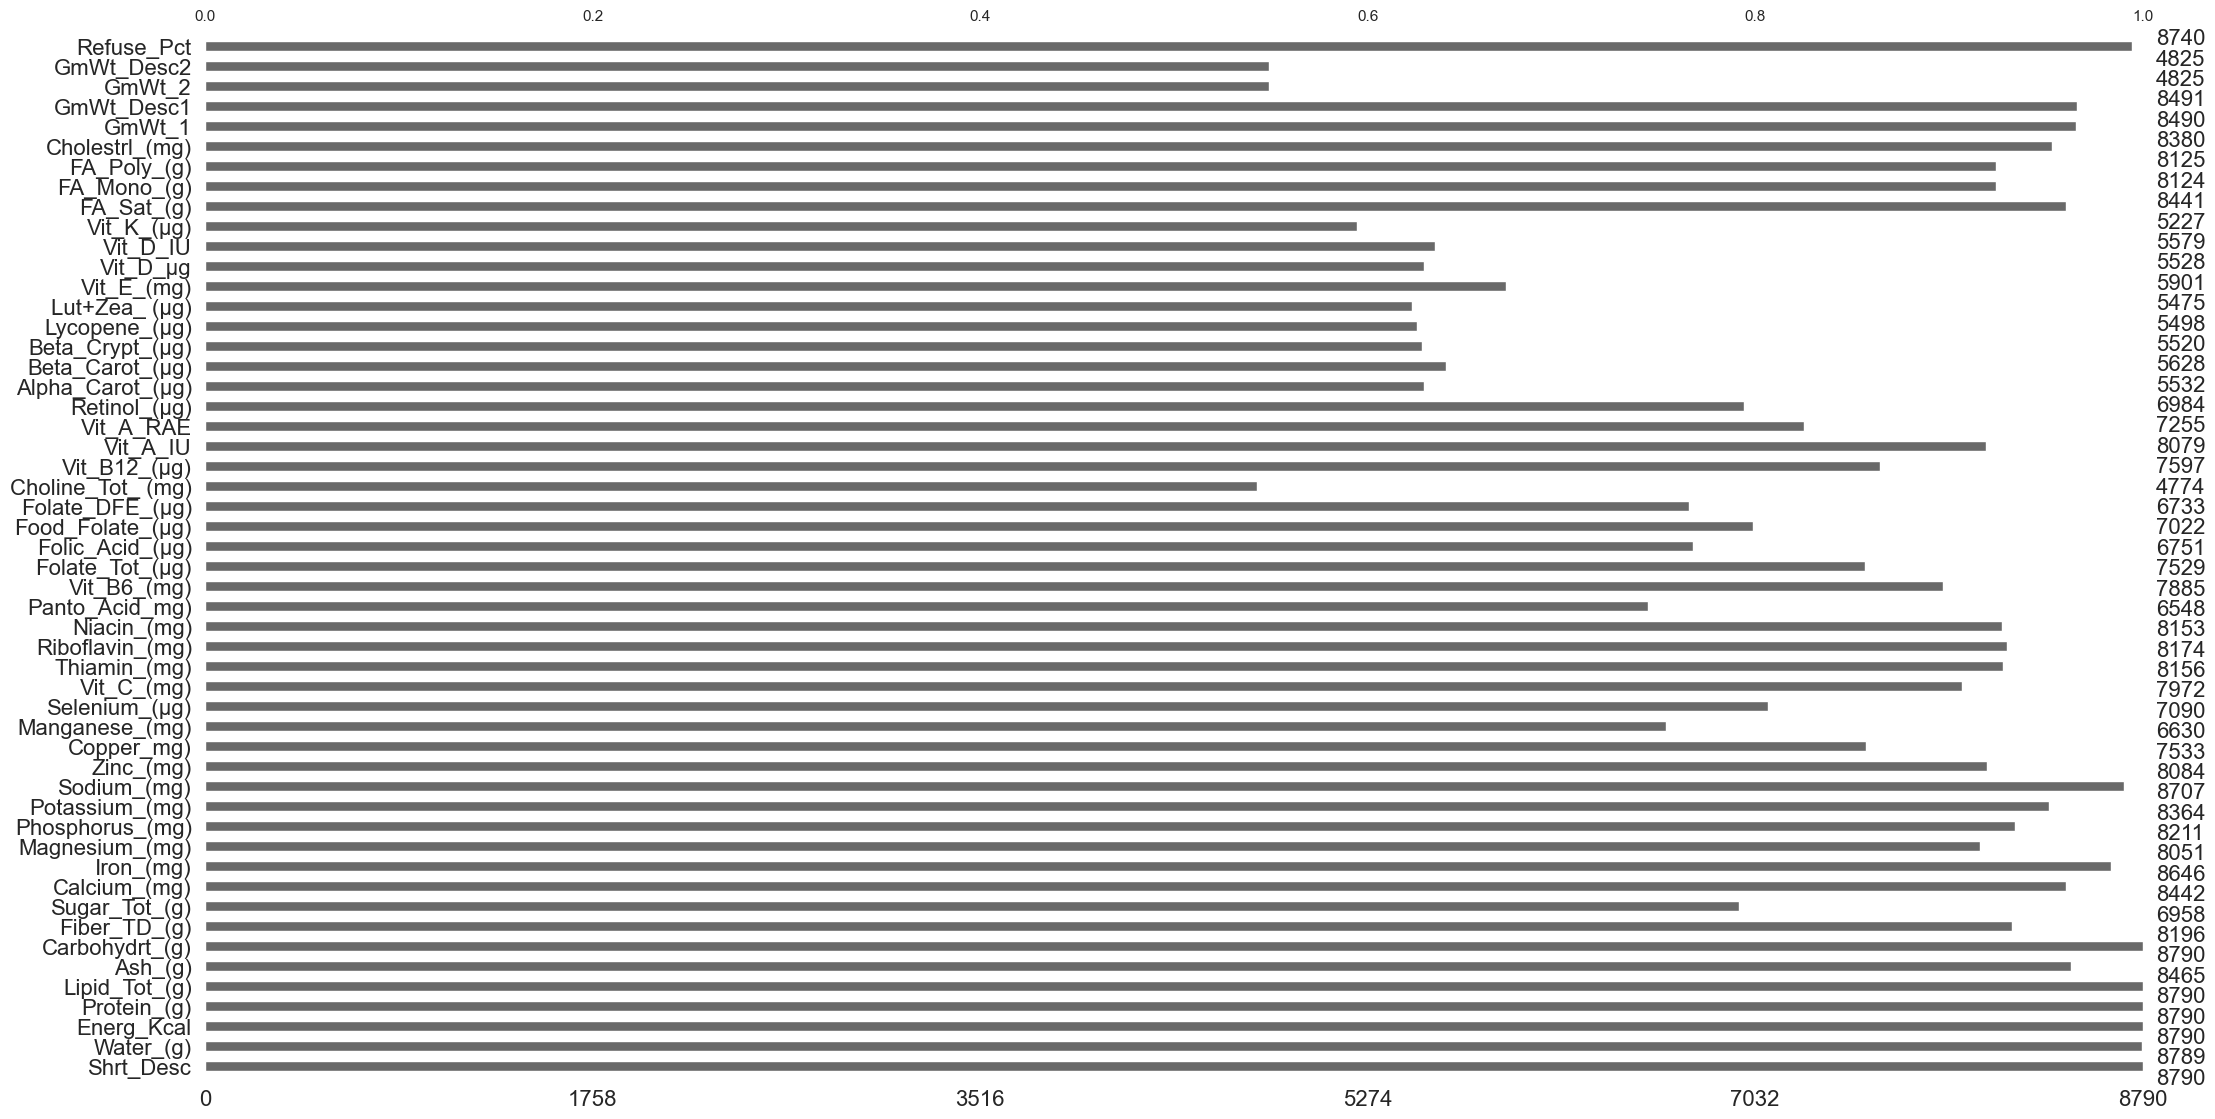

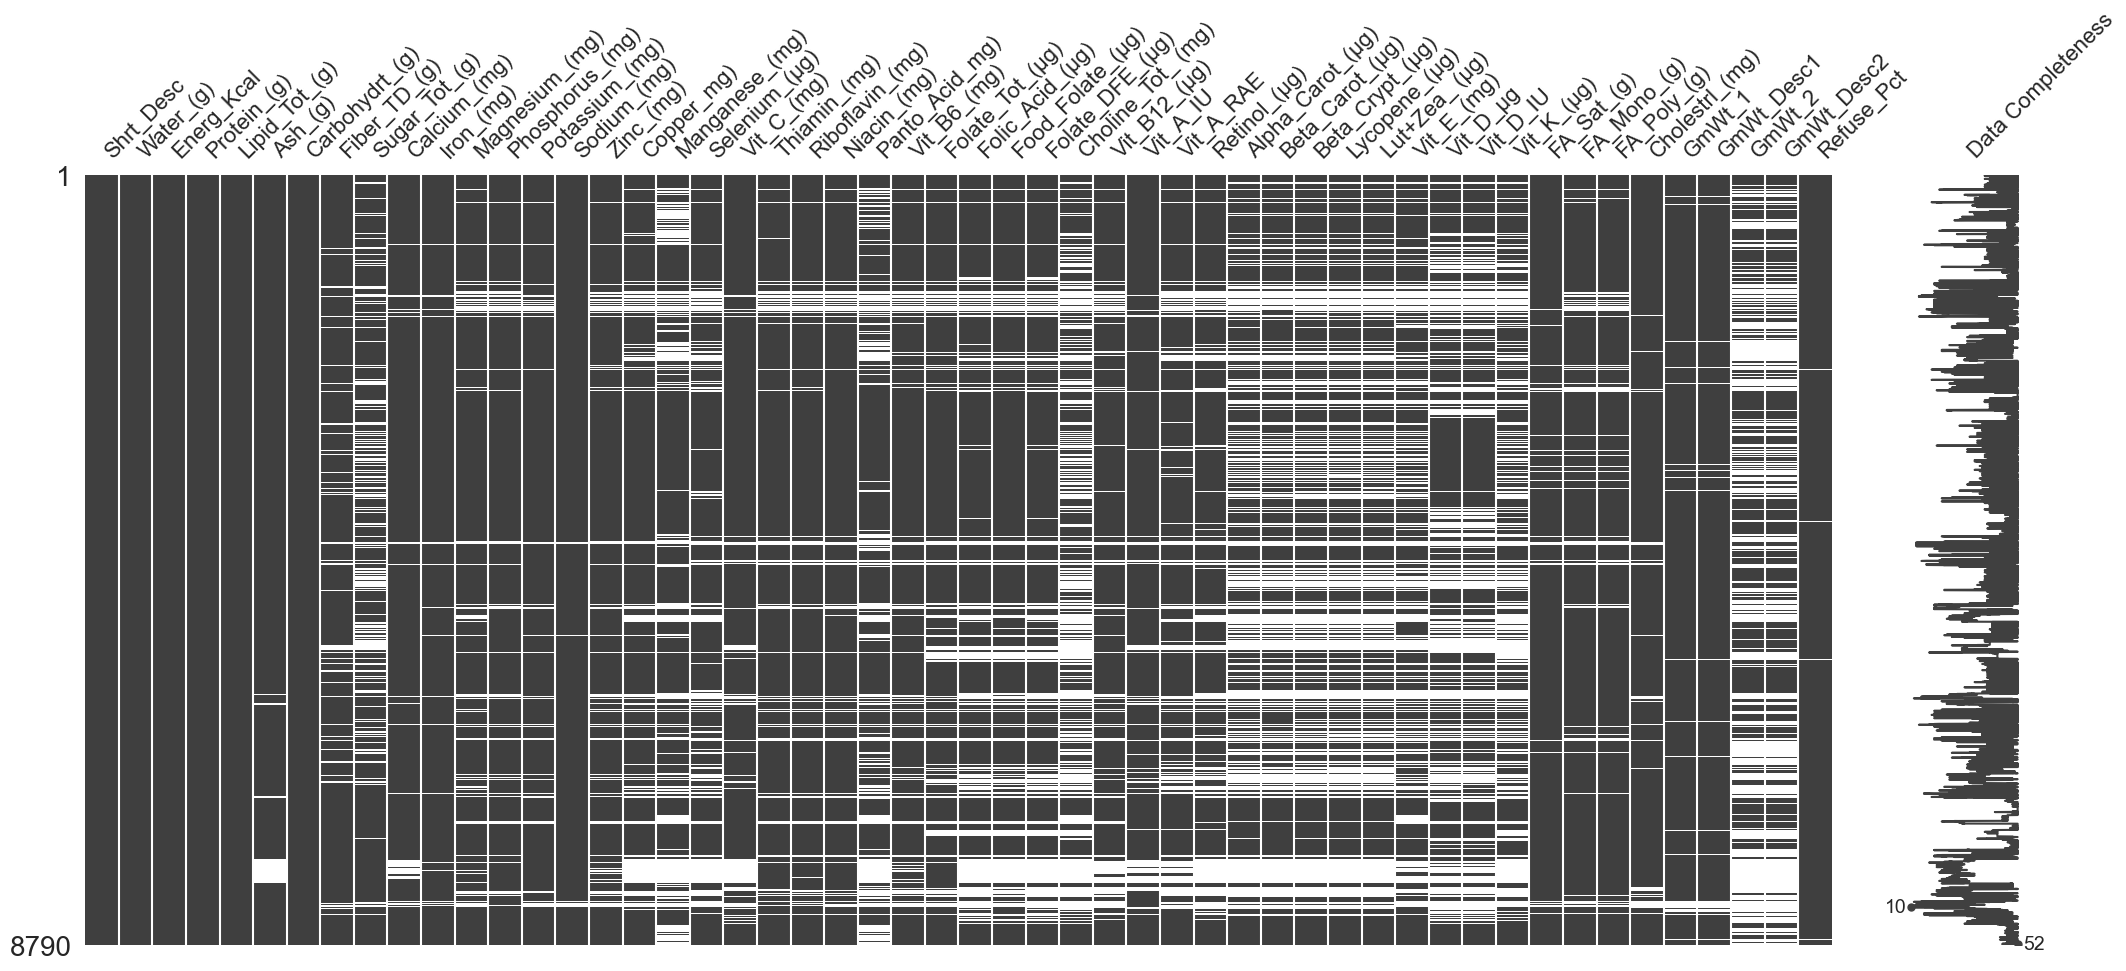

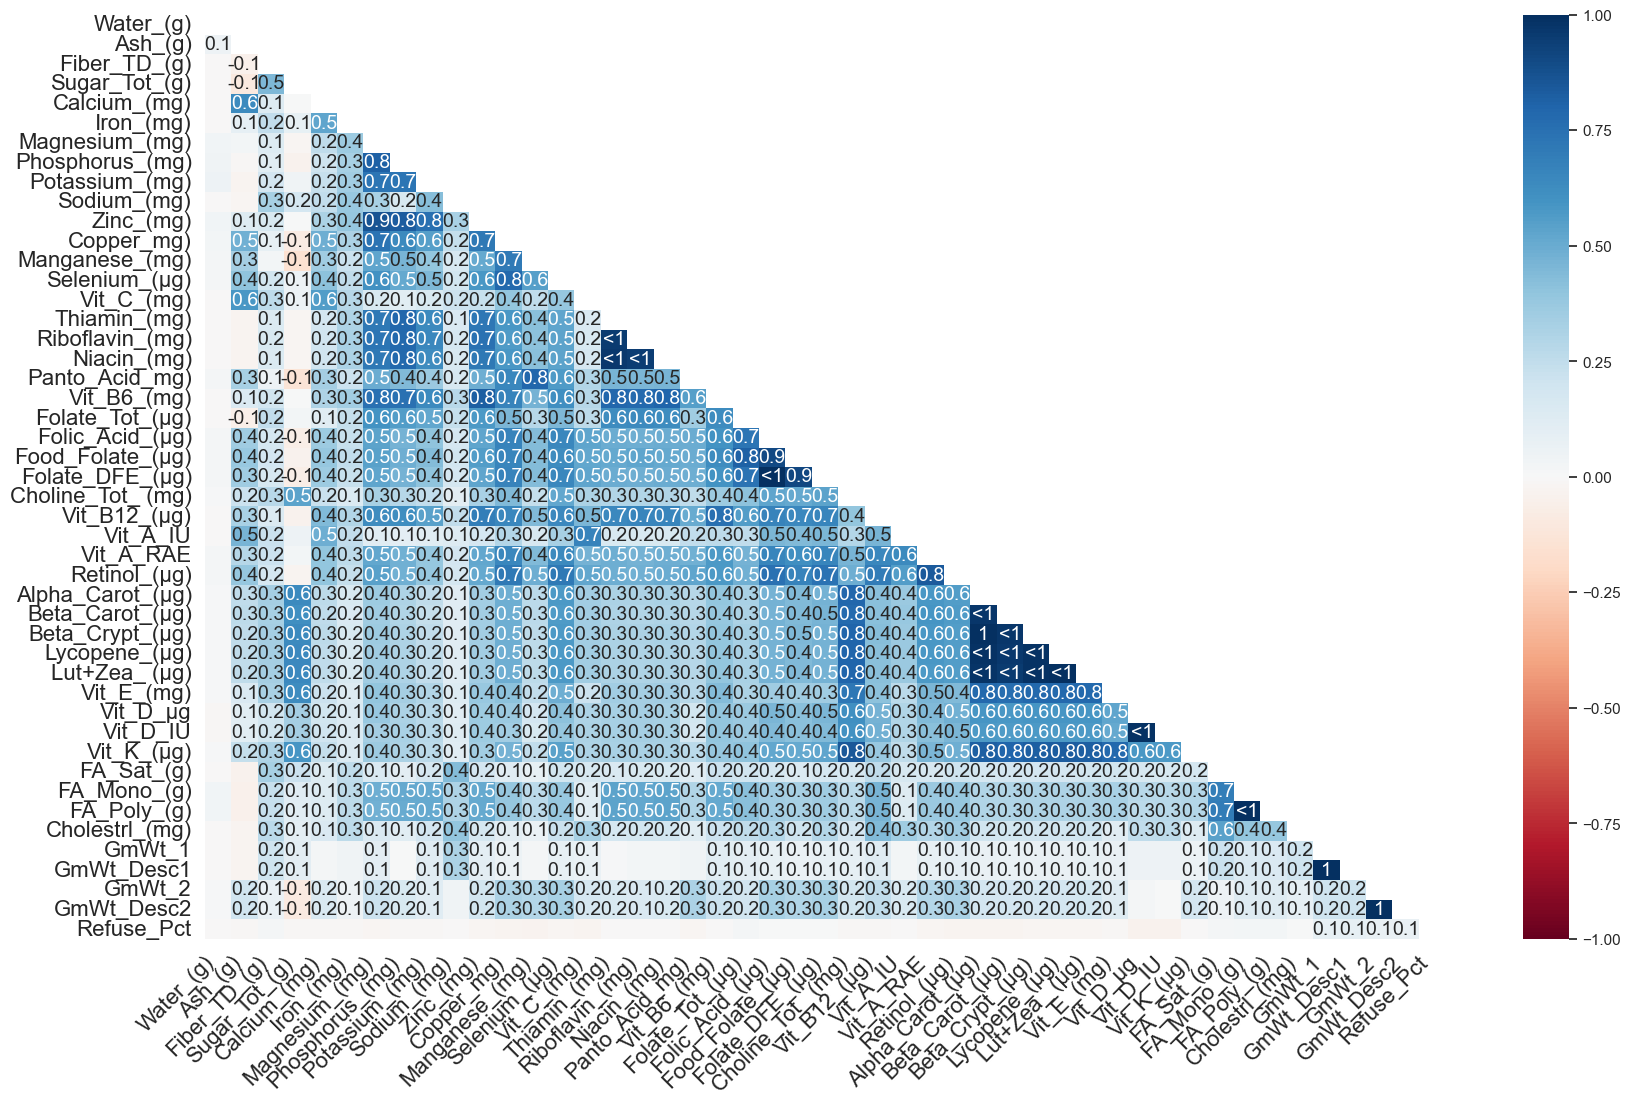

In [155]:

import missingno as msno

#valeurs manquantes

msno.bar(df)
msno.matrix(df, labels=True)
msno.heatmap(df)

In [156]:
# Calcul du nombre de valeurs manquantes pour chaque variable
missing_values = df.isnull().sum()

# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = missing_values / len(df)

# Création d'un dataframe avec les nombres et proportions de valeurs manquantes
missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Nombre de valeurs manquantes', 'Proportion de valeurs manquantes']

# Tri des variables par ordre décroissant de proportion de valeurs manquantes
missing_df = missing_df.sort_values('Proportion de valeurs manquantes', ascending=False)

# Affichage du tableau
missing_df


Nombre de valeurs manquantes  \
Choline_Tot_ (mg)                          4016   
GmWt_Desc2                                 3965   
GmWt_2                                     3965   
Vit_K_(µg)                                 3563   
Lut+Zea_ (µg)                              3315   
Lycopene_(µg)                              3292   
Beta_Crypt_(µg)                            3270   
Vit_D_µg                                   3262   
Alpha_Carot_(µg)                           3258   
Vit_D_IU                                   3211   
Beta_Carot_(µg)                            3162   
Vit_E_(mg)                                 2889   
Panto_Acid_mg)                             2242   
Manganese_(mg)                             2160   
Folate_DFE_(µg)                            2057   
Folic_Acid_(µg)                            2039   
Sugar_Tot_(g)                              1832   
Retinol_(µg)                               1806   
Food_Folate_(µg)                           1768   
Selenium_(µg)                              1700   
Vit_A_RAE                                  1535   
Folate_Tot_(µg)                            1261   
Copper_mg)                                 1257   
Vit_B12_(µg)                               1193   
Vit_B6_(mg)                                 905   
Vit_C_(mg)                                  818   
Magnesium_(mg)                              739   
Vit_A_IU                                    711   
Zinc_(mg)                                   706   
FA_Mono_(g)                                 666   
FA_Poly_(g)                                 665   
Niacin_(mg)                                 637   
Thiamin_(mg)                                634   
Riboflavin_(mg)                             616   
Fiber_TD_(g)                                594   
Phosphorus_(mg)                             579   
Potassium_(mg)                              426   
Cholestrl_(mg)                              410   
FA_Sat_(g)                                  349   
Calcium_(mg)                                348   
Ash_(g)                                     325   
GmWt_1                                      300   
GmWt_Desc1                                  299   
Iron_(mg)                                   144   
Sodium_(mg)                                  83   
Refuse_Pct                                   50   
Water_(g)                                     1   
Carbohydrt_(g)                                0   
Lipid_Tot_(g)                                 0   
Protein_(g)                                   0   
Energ_Kcal                                    0   
Shrt_Desc                                     0   

                   Proportion de valeurs manquantes  
Choline_Tot_ (mg)                          0.456883  
GmWt_Desc2                                 0.451081  
GmWt_2                                     0.451081  
Vit_K_(µg)                                 0.405347  
Lut+Zea_ (µg)                              0.377133  
Lycopene_(µg)                              0.374516  
Beta_Crypt_(µg)                            0.372014  
Vit_D_µg                                   0.371104  
Alpha_Carot_(µg)                           0.370648  
Vit_D_IU                                   0.365301  
Beta_Carot_(µg)                            0.359727  
Vit_E_(mg)                                 0.328669  
Panto_Acid_mg)                             0.255063  
Manganese_(mg)                             0.245734  
Folate_DFE_(µg)                            0.234016  
Folic_Acid_(µg)                            0.231968  
Sugar_Tot_(g)                              0.208419  
Retinol_(µg)                               0.205461  
Food_Folate_(µg)                           0.201138  
Selenium_(µg)                              0.193402  
Vit_A_RAE                                  0.174630  
Folate_Tot_(µg)                            0.143458  
Copper_mg)                                 0.143003  
Vit_B12_(µg)       

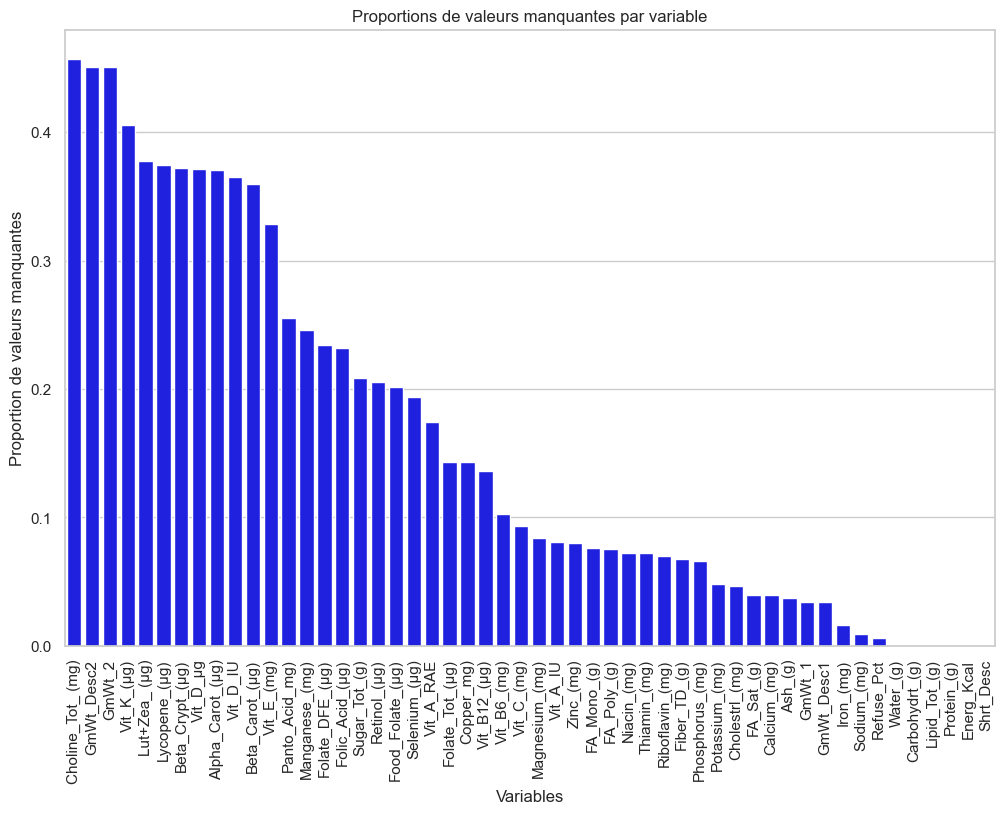

In [157]:
# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = df.isnull().mean().sort_values(ascending=False)

# Création du graphique avec Seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=missing_proportions.index, y=missing_proportions.values, ax=ax, color='blue')
ax.set_xlabel('Variables')
ax.set_ylabel('Proportion de valeurs manquantes')
ax.set_xticklabels(missing_proportions.index, rotation=90)
ax.set_title('Proportions de valeurs manquantes par variable')
plt.show()

In [158]:
vars_list = ['Energ_Kcal','Protein_(g)', 'Lipid_Tot_(g)','Carbohydrt_(g)', 'Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)','Potassium_(mg)', 'Sodium_(mg)','Zinc_(mg)','Vit_C_(mg)','Thiamin_(mg)','Riboflavin_(mg)','Niacin_(mg)','Vit_B6_(mg)','FA_Sat_(g)','Water_(g)']


# Calcul de la proportion de valeurs manquantes pour chaque variable dans la liste
missing_prop = df[vars_list].isna().mean().reset_index()

# Renommage des colonnes
missing_prop.columns = ['variable', 'missing_prop']

# Tri par ordre décroissant de la proportion de valeurs manquantes
missing_prop = missing_prop.sort_values('missing_prop', ascending=False)

# Affichage du résultat
print(missing_prop)


           variable  missing_prop
5     Sugar_Tot_(g)      0.208419
17      Vit_B6_(mg)      0.102958
13       Vit_C_(mg)      0.093060
8    Magnesium_(mg)      0.084073
12        Zinc_(mg)      0.080319
16      Niacin_(mg)      0.072469
14     Thiamin_(mg)      0.072127
15  Riboflavin_(mg)      0.070080
4      Fiber_TD_(g)      0.067577
9   Phosphorus_(mg)      0.065870
10   Potassium_(mg)      0.048464
18       FA_Sat_(g)      0.039704
6      Calcium_(mg)      0.039590
7         Iron_(mg)      0.016382
11      Sodium_(mg)      0.009443
19        Water_(g)      0.000114
1       Protein_(g)      0.000000
3    Carbohydrt_(g)      0.000000
2     Lipid_Tot_(g)      0.000000
0        Energ_Kcal      0.000000


Dans l'optique d'une réduction de variablen on choisit les variables qui peuvent avoir un impact sur la quantité d'energie total

In [159]:
keep_vars=['Shrt_Desc', 'Energ_Kcal','Protein_(g)', 'Lipid_Tot_(g)','Carbohydrt_(g)', 'Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)','Potassium_(mg)', 'Sodium_(mg)','Zinc_(mg)','Vit_C_(mg)','Thiamin_(mg)','Riboflavin_(mg)','Niacin_(mg)','Vit_B6_(mg)','FA_Sat_(g)','Water_(g)']

# Sélection des colonnes de la base de données correspondant aux variables sélectionnées
df_restrict = df[keep_vars]

# Affichage des 10 premières lignes de la base de données modifiée
df_restrict.head(10)

Shrt_Desc  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
NDB_No                                                                   
1001          BUTTER,WITH SALT         717         0.85          81.11   
1002    BUTTER,WHIPPED,W/ SALT         718         0.49          78.30   
1003      BUTTER OIL,ANHYDROUS         876         0.28          99.48   
1004               CHEESE,BLUE         353        21.40          28.74   
1005              CHEESE,BRICK         371        23.24          29.68   
1006               CHEESE,BRIE         334        20.75          27.68   
1007          CHEESE,CAMEMBERT         300        19.80          24.26   
1008            CHEESE,CARAWAY         376        25.18          29.20   
1009            CHEESE,CHEDDAR         404        22.87          33.31   
1010           CHEESE,CHESHIRE         387        23.37          30.60   

        Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  Calcium_(mg)  Iron_(mg)  \
NDB_No                                                                         
1001              0.06           0.0           0.06          24.0       0.02   
1002              2.87           0.0           0.06          23.0       0.05   
1003              0.00           0.0           0.00           4.0       0.00   
1004              2.34           0.0           0.50         528.0       0.31   
1005              2.79           0.0           0.51         674.0       0.43   
1006              0.45           0.0           0.45         184.0       0.50   
1007              0.46           0.0           0.46         388.0       0.33   
1008              3.06           0.0            NaN         673.0       0.64   
1009              3.09           0.0           0.48         710.0       0.14   
1010              4.78           0.0            NaN         643.0       0.21   

        Magnesium_(mg)  ...  Potassium_(mg)  Sodium_(mg)  Zinc_(mg)  \
NDB_No                  ...                                           
1001               2.0  ...            24.0        643.0       0.09   
1002               1.0  ...            41.0        583.0       0.05   
1003               0.0  ...             5.0          2.0       0.01   
1004              23.0  ...           256.0       1146.0       2.66   
1005              24.0  ...           136.0        560.0       2.60   
1006              20.0  ...           152.0        629.0       2.38   
1007              20.0  ...           187.0        842.0       2.38   
1008              22.0  ...            93.0        690.0       2.94   
1009              27.0  ...            76.0        653.0       3.64   
1010              21.0  ...            95.0        700.0       2.79   

        Vit_C_(mg)  Thiamin_(mg)  Riboflavin_(mg)  Niacin_(mg)  Vit_B6_(mg)  \
NDB_No                                                                        
1001           0.0         0.005            0.034        0.042        0.003   
1002           0.0         0.007            0.064        0.022        0.008   
1003           0.0         0.001            0.005        0.003        0.001   
1004           0.0         0.029            0.382        1.016        0.166   
1005           0.0         0.014            0.351        0.118        0.065   
1006           0.0         0.070            0.520        0.380        0.235   
1007           0.0         0.028            0.488        0.630        0.227   
1008           0.0         0.031            0.450        0.180        0.074   
1009           0.0         0.029            0.428        0.059        0.066   
1010           0.0         0.046            0.293        0.080        0.074   

        FA_Sat_(g)  Water_(g)  
NDB_No                         
1001        51.368      15.87  
1002        45.390      16.72  
1003        61.924       0.24  
1004        18.669      42.41  
1005        18.764      41.11  
1006        17.410      48.42  
1007        15.259      51.80  
1008        18.584      39.28  
1009        18.867      37.02  
1010        19.47

In [ ]:
## Traitement des valeurs manquantes: on remplace ici les valeurs manquantes par zéro car on ne peut pas avoir tous les nutriments dans tous les aliments

# Remplacement des valeurs manquantes par zéro
df_miss = df_restrict.fillna(0)

# Affichage des 10 premières lignes de la base de données
df_miss.head(10)

Shrt_Desc  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
NDB_No                                                                   
1001          BUTTER,WITH SALT         717         0.85          81.11   
1002    BUTTER,WHIPPED,W/ SALT         718         0.49          78.30   
1003      BUTTER OIL,ANHYDROUS         876         0.28          99.48   
1004               CHEESE,BLUE         353        21.40          28.74   
1005              CHEESE,BRICK         371        23.24          29.68   
1006               CHEESE,BRIE         334        20.75          27.68   
1007          CHEESE,CAMEMBERT         300        19.80          24.26   
1008            CHEESE,CARAWAY         376        25.18          29.20   
1009            CHEESE,CHEDDAR         404        22.87          33.31   
1010           CHEESE,CHESHIRE         387        23.37          30.60   

        Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  Calcium_(mg)  Iron_(mg)  \
NDB_No                                                                         
1001              0.06           0.0           0.06          24.0       0.02   
1002              2.87           0.0           0.06          23.0       0.05   
1003              0.00           0.0           0.00           4.0       0.00   
1004              2.34           0.0           0.50         528.0       0.31   
1005              2.79           0.0           0.51         674.0       0.43   
1006              0.45           0.0           0.45         184.0       0.50   
1007              0.46           0.0           0.46         388.0       0.33   
1008              3.06           0.0           0.00         673.0       0.64   
1009              3.09           0.0           0.48         710.0       0.14   
1010              4.78           0.0           0.00         643.0       0.21   

        Magnesium_(mg)  ...  Potassium_(mg)  Sodium_(mg)  Zinc_(mg)  \
NDB_No                  ...                                           
1001               2.0  ...            24.0        643.0       0.09   
1002               1.0  ...            41.0        583.0       0.05   
1003               0.0  ...             5.0          2.0       0.01   
1004              23.0  ...           256.0       1146.0       2.66   
1005              24.0  ...           136.0        560.0       2.60   
1006              20.0  ...           152.0        629.0       2.38   
1007              20.0  ...           187.0        842.0       2.38   
1008              22.0  ...            93.0        690.0       2.94   
1009              27.0  ...            76.0        653.0       3.64   
1010              21.0  ...            95.0        700.0       2.79   

        Vit_C_(mg)  Thiamin_(mg)  Riboflavin_(mg)  Niacin_(mg)  Vit_B6_(mg)  \
NDB_No                                                                        
1001           0.0         0.005            0.034        0.042        0.003   
1002           0.0         0.007            0.064        0.022        0.008   
1003           0.0         0.001            0.005        0.003        0.001   
1004           0.0         0.029            0.382        1.016        0.166   
1005           0.0         0.014            0.351        0.118        0.065   
1006           0.0         0.070            0.520        0.380        0.235   
1007           0.0         0.028            0.488        0.630        0.227   
1008           0.0         0.031            0.450        0.180        0.074   
1009           0.0         0.029            0.428        0.059        0.066   
1010           0.0         0.046            0.293        0.080        0.074   

        FA_Sat_(g)  Water_(g)  
NDB_No                         
1001        51.368      15.87  
1002        45.390      16.72  
1003        61.924       0.24  
1004        18.669      42.41  
1005        18.764      41.11  
1006        17.410      48.42  
1007        15.259      51.80  
1008        18.584      39.28  
1009        18.867      37.02  
1010        19.47

In [161]:
# Calcul du nombre de valeurs manquantes pour chaque variable
missing_values = df_miss.isnull().sum()

# Calcul de la proportion de valeurs manquantes pour chaque variable
missing_proportions = missing_values / len(df)

# Création d'un dataframe avec les nombres et proportions de valeurs manquantes
missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Nombre de valeurs manquantes', 'Proportion de valeurs manquantes']

# Tri des variables par ordre décroissant de proportion de valeurs manquantes
missing_df = missing_df.sort_values('Proportion de valeurs manquantes', ascending=False)

# Affichage du tableau
missing_df

Nombre de valeurs manquantes  \
Shrt_Desc                                   0   
Potassium_(mg)                              0   
FA_Sat_(g)                                  0   
Vit_B6_(mg)                                 0   
Niacin_(mg)                                 0   
Riboflavin_(mg)                             0   
Thiamin_(mg)                                0   
Vit_C_(mg)                                  0   
Zinc_(mg)                                   0   
Sodium_(mg)                                 0   
Phosphorus_(mg)                             0   
Energ_Kcal                                  0   
Magnesium_(mg)                              0   
Iron_(mg)                                   0   
Calcium_(mg)                                0   
Sugar_Tot_(g)                               0   
Fiber_TD_(g)                                0   
Carbohydrt_(g)                              0   
Lipid_Tot_(g)                               0   
Protein_(g)                                 0   
Water_(g)                                   0   

                 Proportion de valeurs manquantes  
Shrt_Desc                                     0.0  
Potassium_(mg)                                0.0  
FA_Sat_(g)                                    0.0  
Vit_B6_(mg)                                   0.0  
Niacin_(mg)                                   0.0  
Riboflavin_(mg)                               0.0  
Thiamin_(mg)                                  0.0  
Vit_C_(mg)                                    0.0  
Zinc_(mg)                                     0.0  
Sodium_(mg)                                   0.0  
Phosphorus_(mg)                               0.0  
Energ_Kcal                                    0.0  
Magnesium_(mg)                                0.0  
Iron_(mg)                                     0.0  
Calcium_(mg)                                  0.0  
Sugar_Tot_(g)                                 0.0  
Fiber_TD_(g)                                  0.0  
Carbohydrt_(g)                                0.0  
Lipid_Tot_(g)                                 0.0  
Protein_(g)                                   0.0  
Water_(g)                                     0.0

## Analyse univariés

In [162]:
df_miss.describe()

Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Carbohydrt_(g)  Fiber_TD_(g)  \
count  8790.000000  8790.000000    8790.000000     8790.000000   8790.000000   
mean    226.317634    11.342849      10.553725       22.127710      2.039625   
std     169.877539    10.530474      15.814842       27.270822      4.267904   
min       0.000000     0.000000       0.000000        0.000000      0.000000   
25%      91.000000     2.380000       0.950000        0.050000      0.000000   
50%     191.000000     8.000000       5.140000        9.340000      0.400000   
75%     337.000000    19.880000      13.720000       34.910000      2.400000   
max     902.000000    88.320000     100.000000      100.000000     79.000000   

       Sugar_Tot_(g)  Calcium_(mg)    Iron_(mg)  Magnesium_(mg)  \
count    8790.000000   8790.000000  8790.000000     8790.000000   
mean        6.762531     73.700114     2.655447       32.328555   
std        13.723474    200.017998     5.651177       55.816105   
min         0.000000      0.000000     0.000000        0.000000   
25%         0.000000      8.000000     0.500000       10.000000   
50%         0.490000     19.000000     1.325000       20.000000   
75%         6.057500     64.000000     2.570000       29.000000   
max        99.800000   7364.000000   123.600000      781.000000   

       Phosphorus_(mg)  Potassium_(mg)   Sodium_(mg)    Zinc_(mg)  \
count      8790.000000     8790.000000   8790.000000  8790.000000   
mean        154.264164      265.928328    309.545165     1.947369   
std         202.043448      371.155815    939.452380     3.346134   
min           0.000000        0.000000      0.000000     0.000000   
25%          36.000000      112.000000     38.000000     0.220000   
50%         130.000000      220.000000     86.000000     0.800000   
75%         215.000000      329.000000    401.000000     2.670000   
max        9918.000000    16500.000000  38758.000000    90.950000   

        Vit_C_(mg)  Thiamin_(mg)  Riboflavin_(mg)  Niacin_(mg)  Vit_B6_(mg)  \
count  8790.000000   8790.000000      8790.000000  8790.000000  8790.000000   
mean      8.372082      0.207039         0.234561     3.392651     0.261515   
std      65.627097      0.507800         0.438182     4.741533     0.467871   
min       0.000000      0.000000         0.000000     0.000000     0.000000   
25%       0.000000      0.030000         0.047000     0.374000     0.035000   
50%       0.000000      0.077000         0.151000     2.110000     0.119000   
75%       2.500000      0.226000         0.260000     5.059500     0.358000   
max    2732.000000     23.375000        17.500000   127.500000    12.000000   

        FA_Sat_(g)    Water_(g)  
count  8790.000000  8790.000000  
mean      3.434338    54.106061  
std       6.426162    30.776516  
min       0.000000     0.000000  
25%       0.149000    29.692500  
50%       1.435500    63.080000  
75%       4.173750    77.960000  
max      95.600000   100.000000

Energ_Kcal


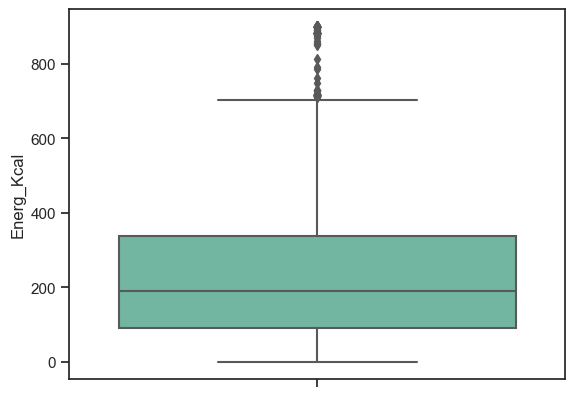

Protein_(g)


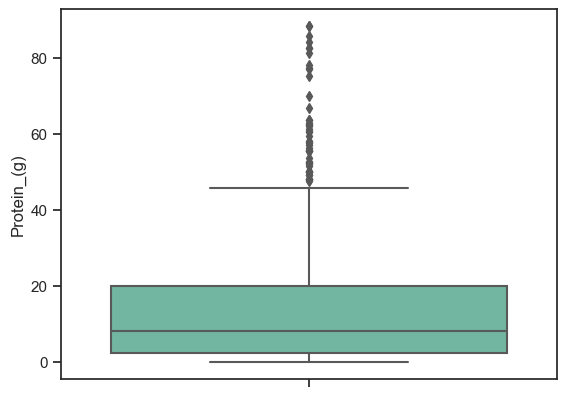

Lipid_Tot_(g)


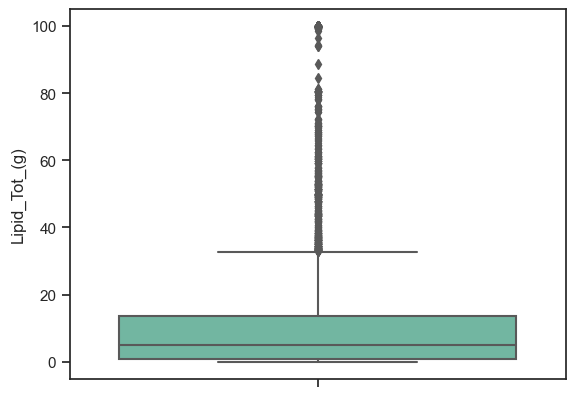

Carbohydrt_(g)


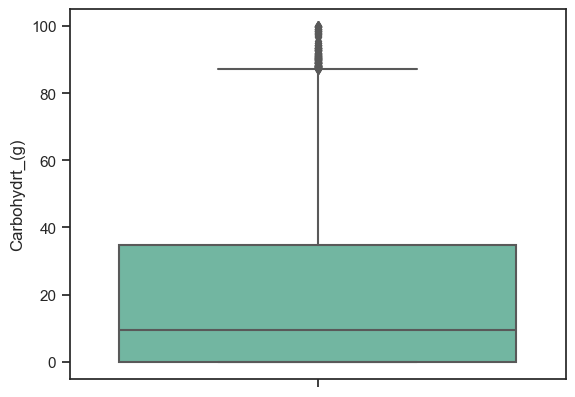

Fiber_TD_(g)


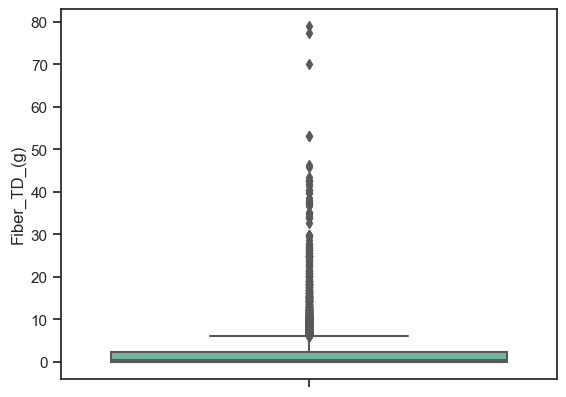

Sugar_Tot_(g)


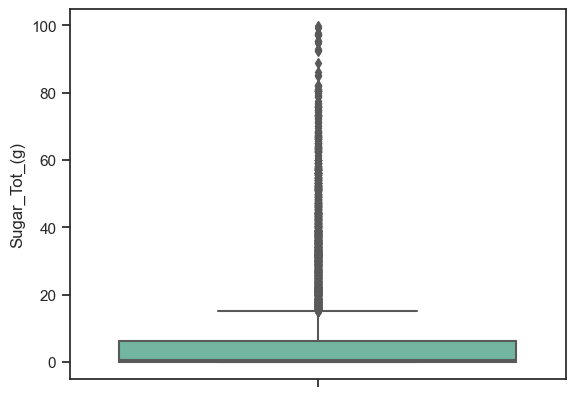

Calcium_(mg)


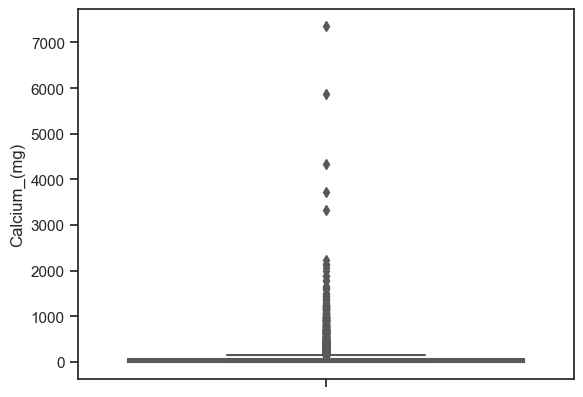

Iron_(mg)


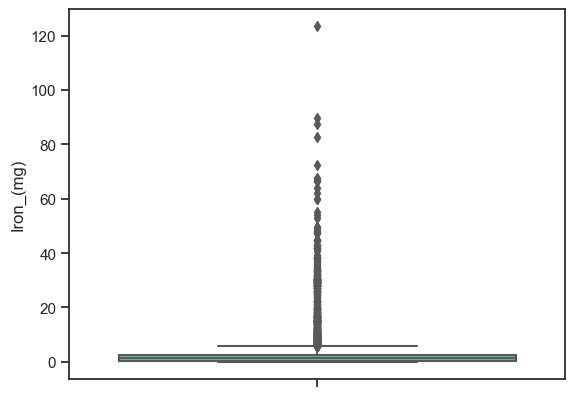

Magnesium_(mg)


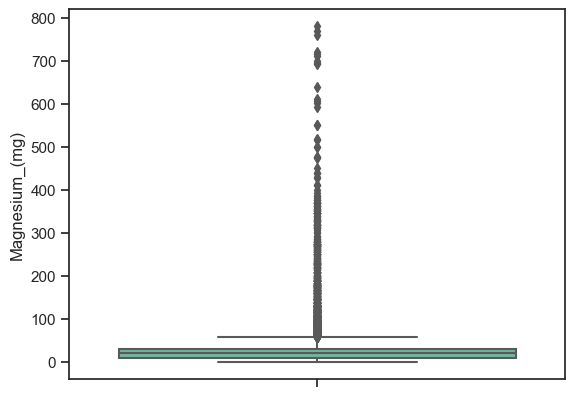

Phosphorus_(mg)


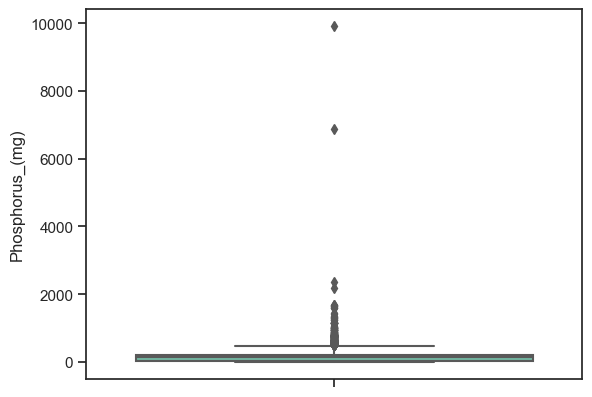

Potassium_(mg)


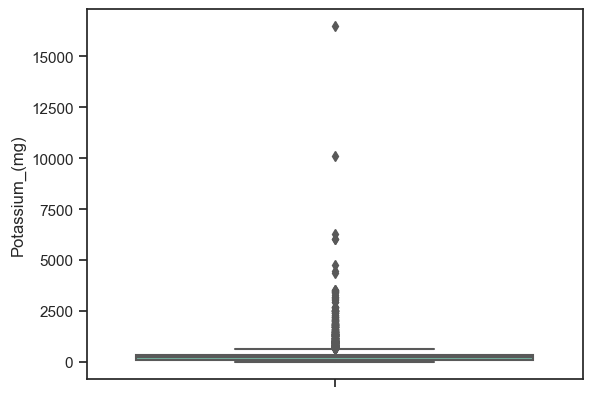

Sodium_(mg)


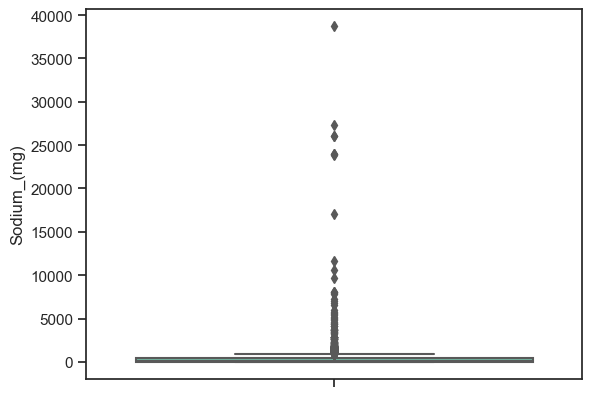

Zinc_(mg)


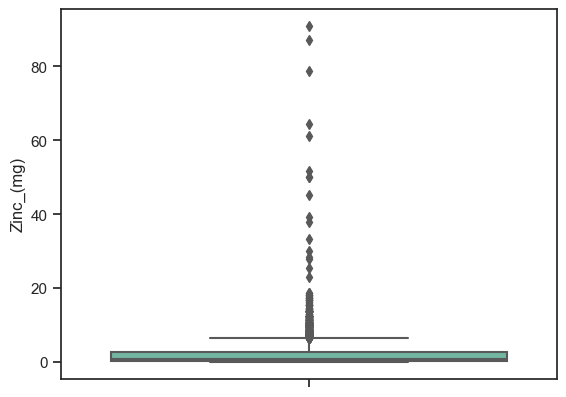

Vit_C_(mg)


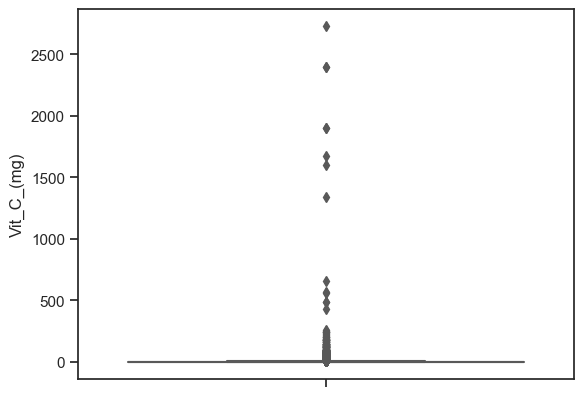

Thiamin_(mg)


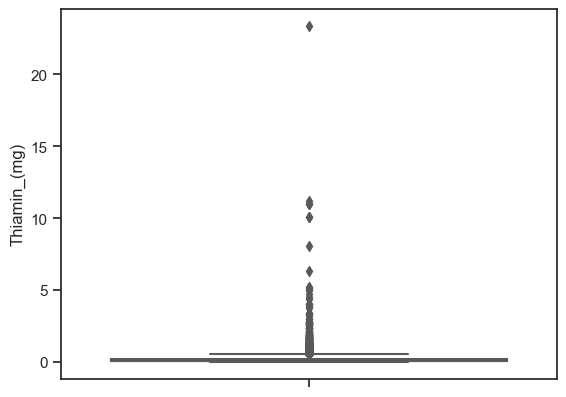

Riboflavin_(mg)


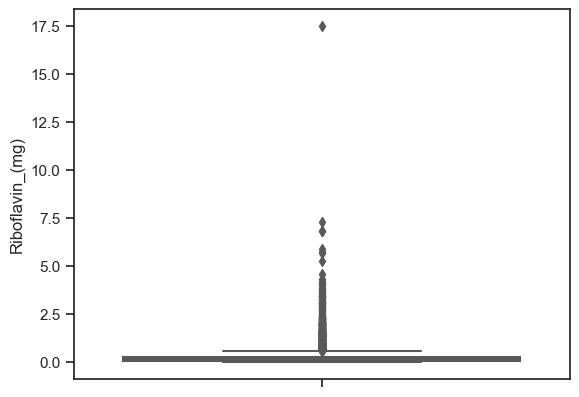

Niacin_(mg)


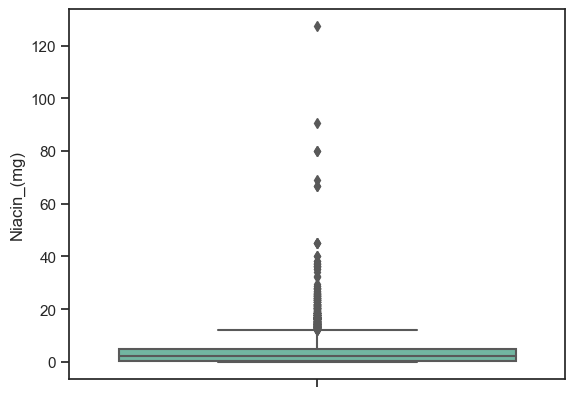

Vit_B6_(mg)


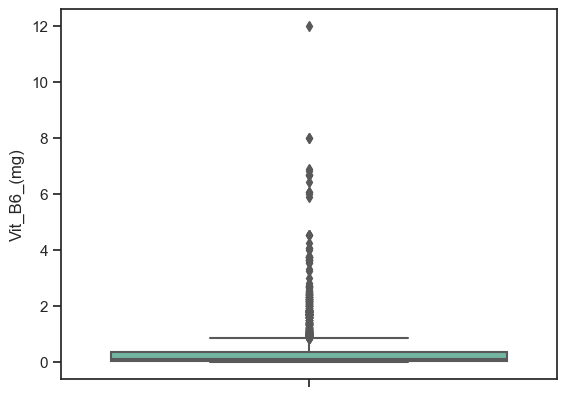

FA_Sat_(g)


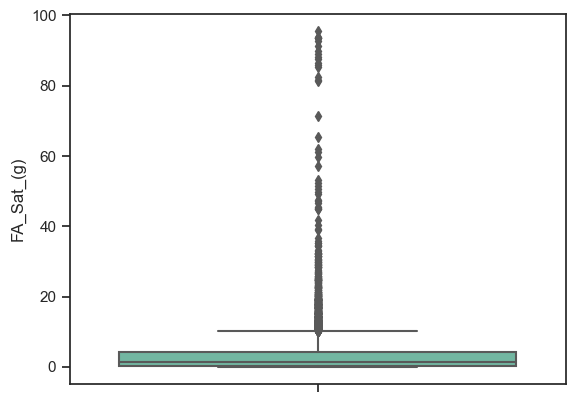

Water_(g)


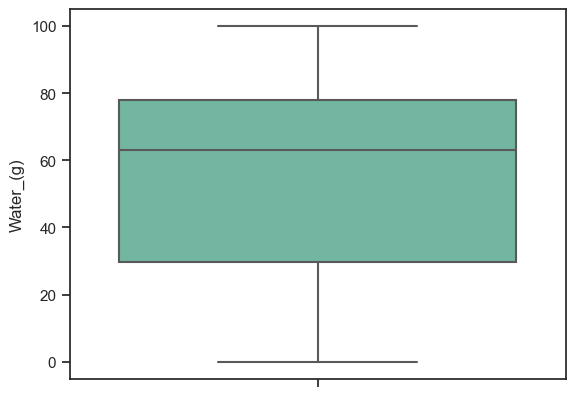

In [163]:

# Sélection des variables quantitatives
quant_vars = df_miss.select_dtypes(include=['float64', 'int64'])

# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(y=var, data=quant_vars, palette="Set2")
    plt.show()

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


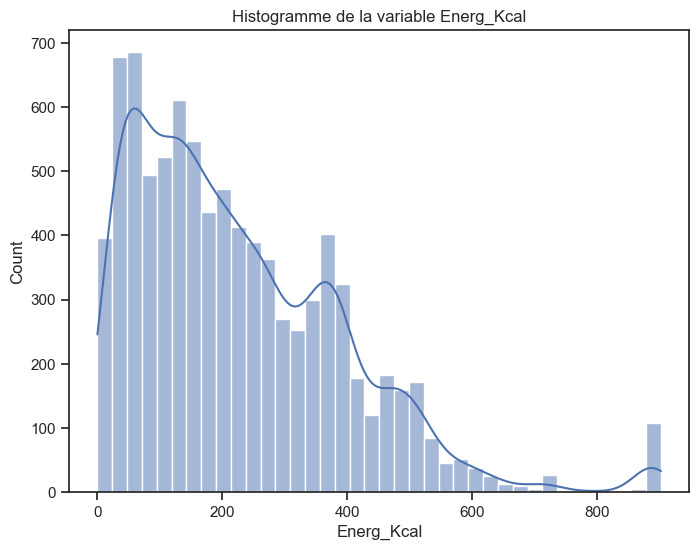

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


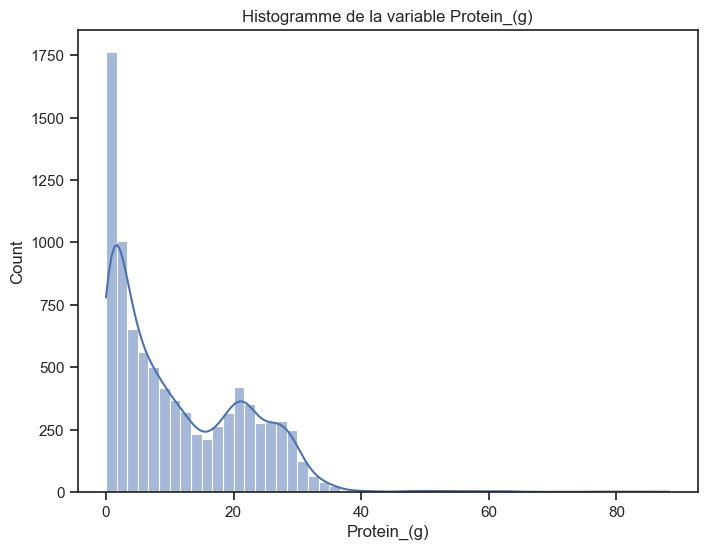

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


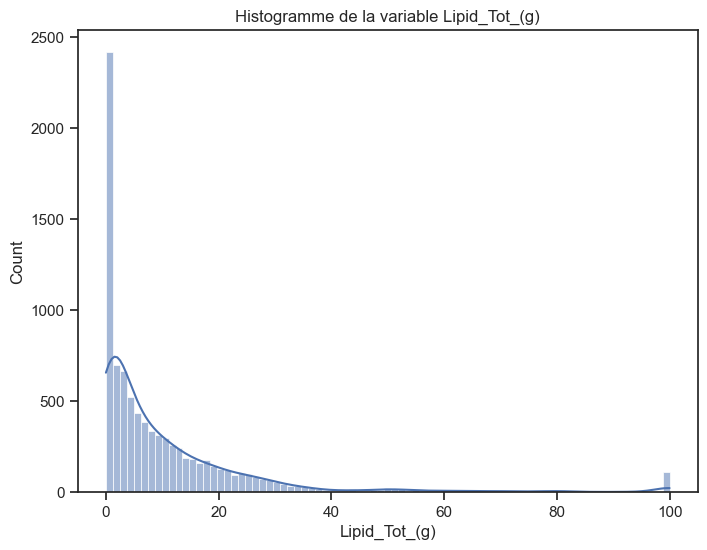

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


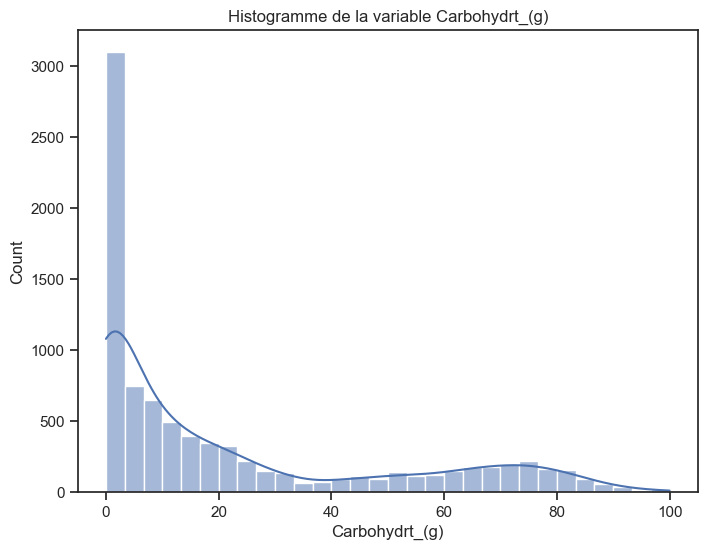

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


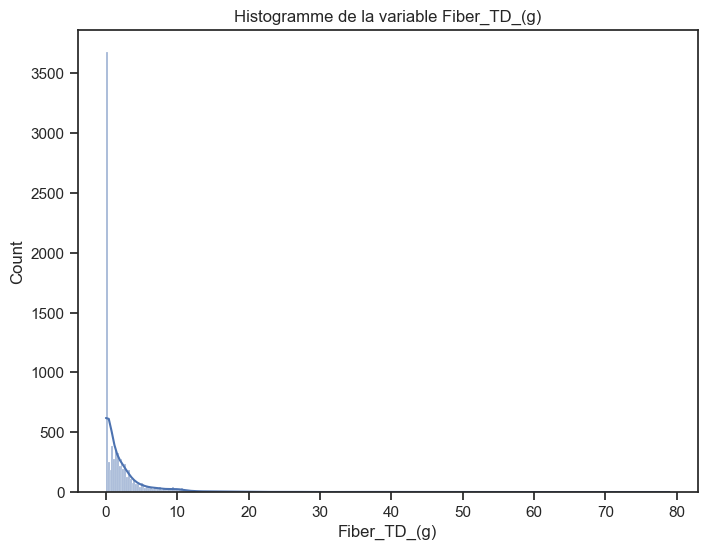

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


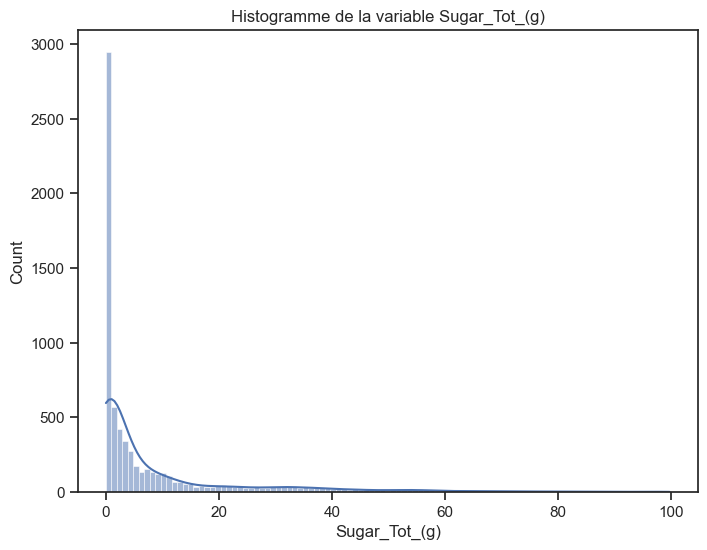

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


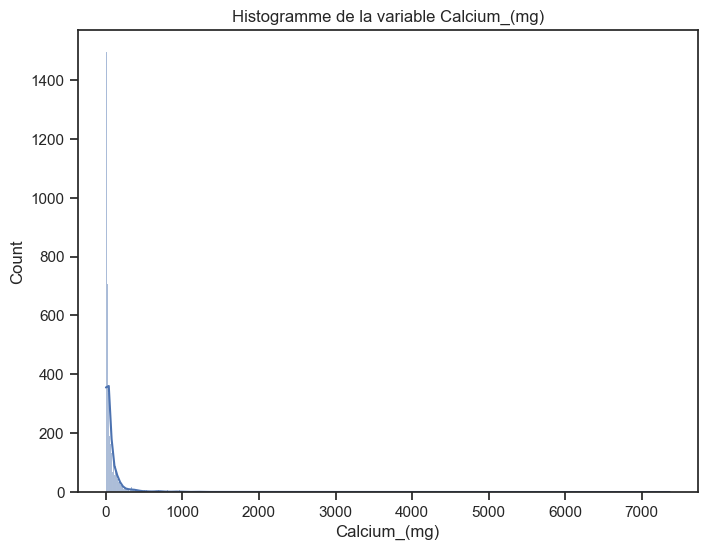

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


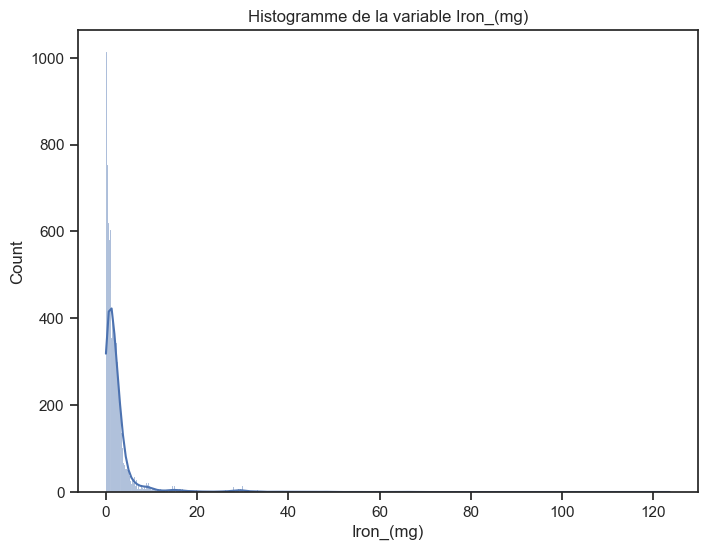

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


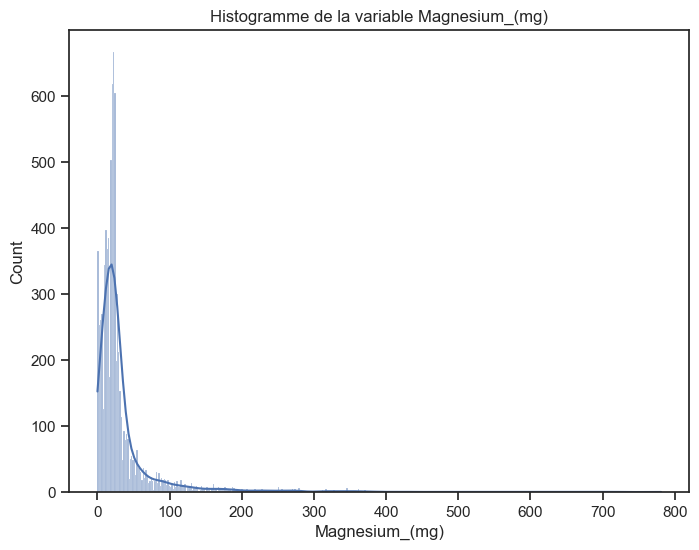

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


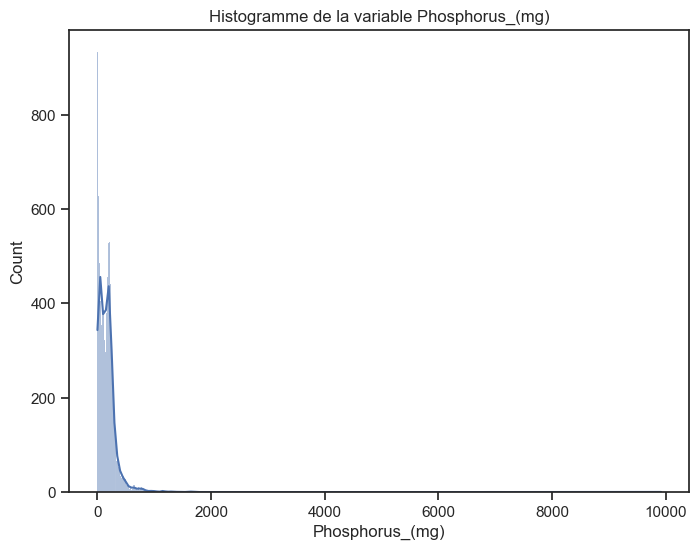

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


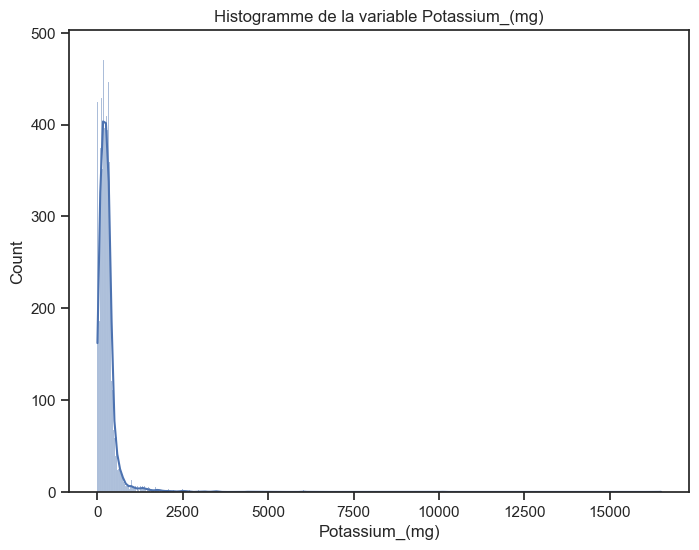

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


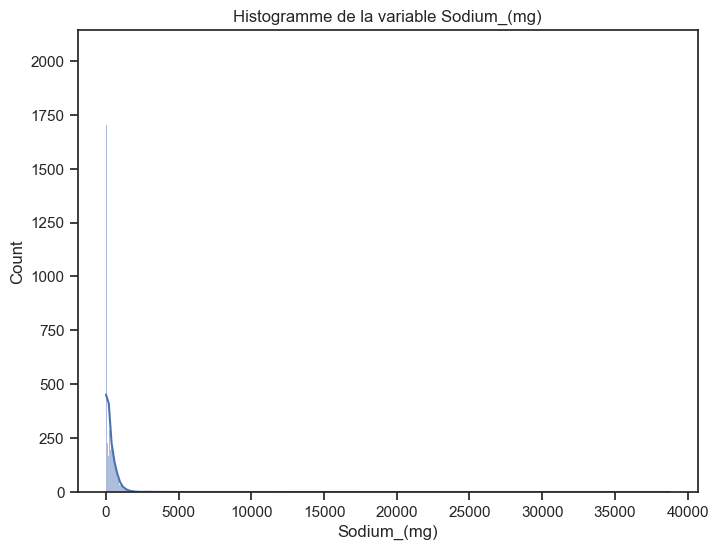

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


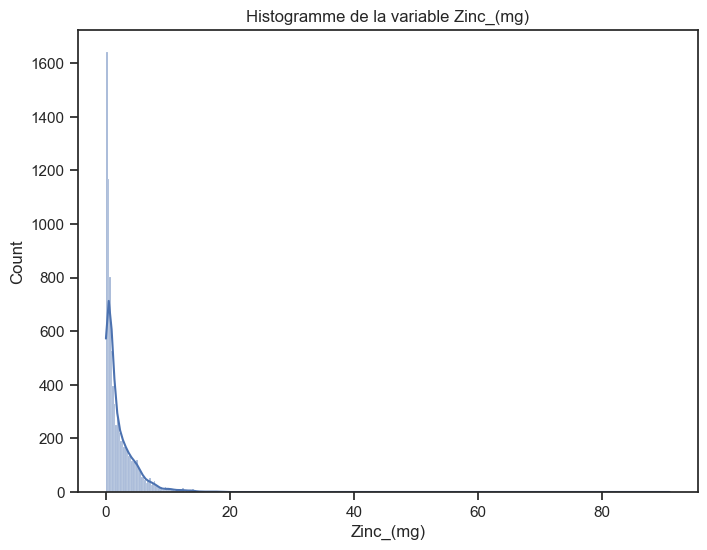

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


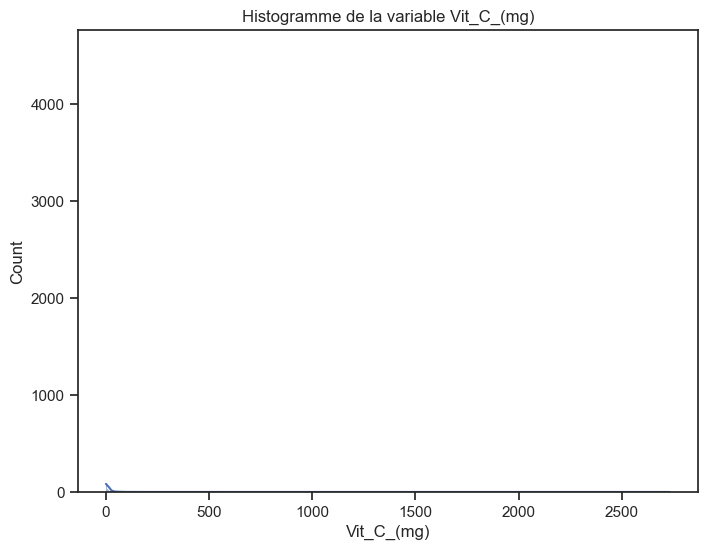

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


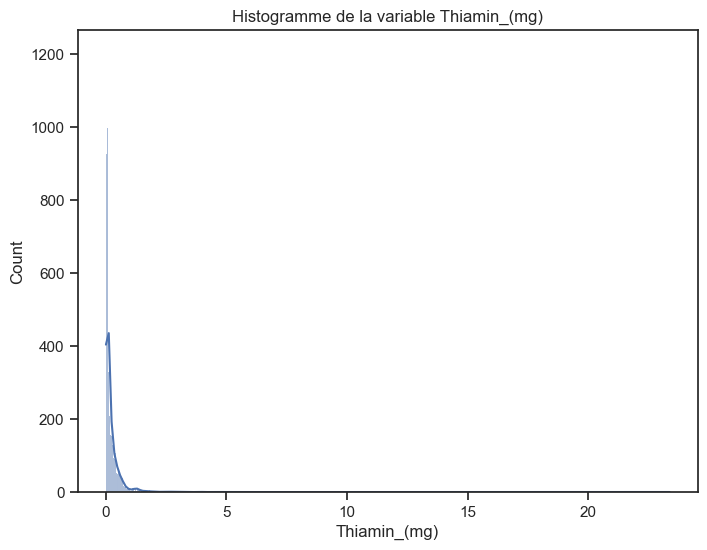

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


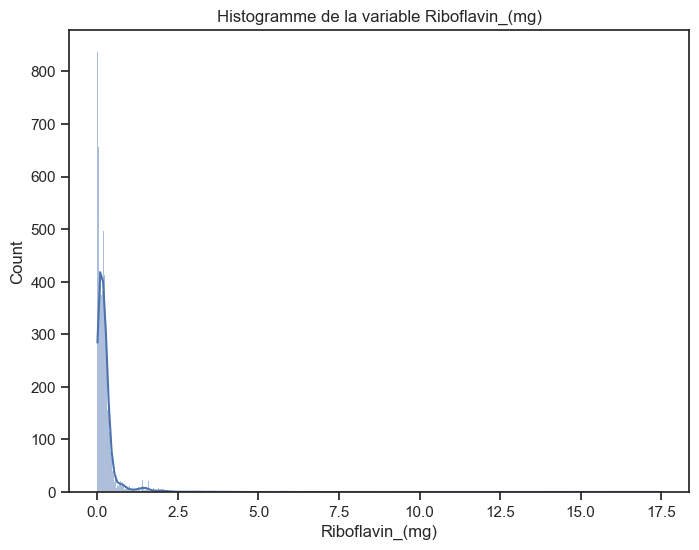

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


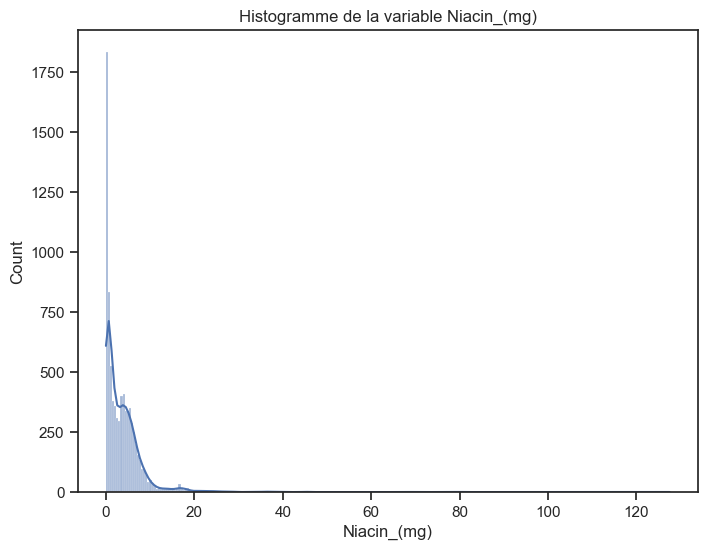

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


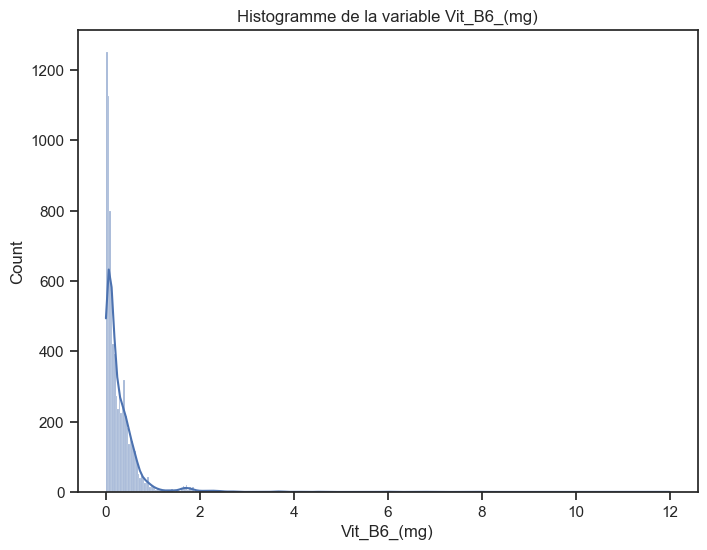

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


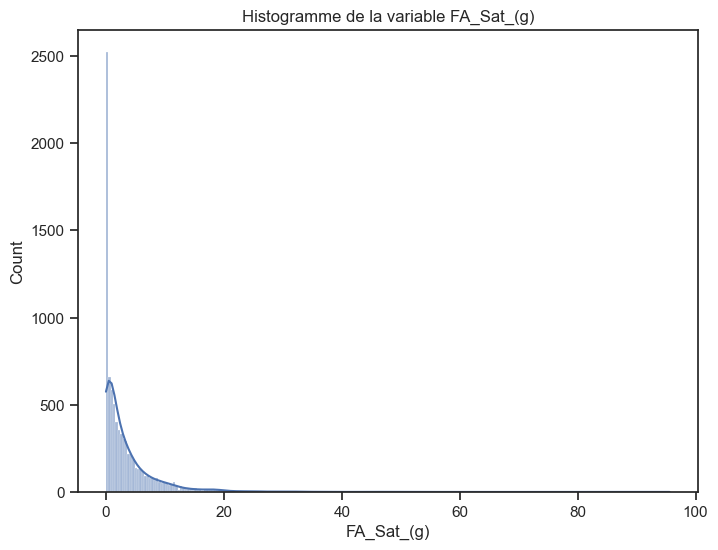

/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


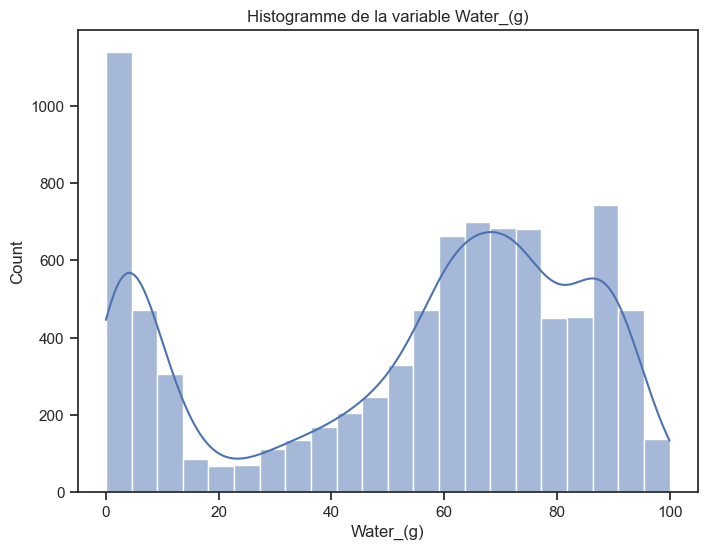

In [164]:
# Analyse de la normalité
from scipy.stats import shapiro

# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in quant_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

In [165]:
# Initialisation du DataFrame pour les résultats des tests de normalité
normality_df = pd.DataFrame(columns=['Variable', 'P-value', 'Normality'])

# Boucle pour calculer les tests de normalité pour chaque variable
for var in quant_vars:
    stat, p = shapiro(quant_vars[var])
    normality = 'Normal' if p > 0.05 else 'Not Normal'
    # Création d'un DataFrame temporaire avec les résultats
    temp_df = pd.DataFrame({'Variable': [var], 'P-value': [p], 'Normality': [normality]})
    # Utilisation de pd.concat() pour ajouter la ligne au DataFrame
    normality_df = pd.concat([normality_df, temp_df], ignore_index=True)

# Affichage du DataFrame des résultats des tests de normalité
print(normality_df)


           Variable  P-value   Normality
0        Energ_Kcal      0.0  Not Normal
1       Protein_(g)      0.0  Not Normal
2     Lipid_Tot_(g)      0.0  Not Normal
3    Carbohydrt_(g)      0.0  Not Normal
4      Fiber_TD_(g)      0.0  Not Normal
5     Sugar_Tot_(g)      0.0  Not Normal
6      Calcium_(mg)      0.0  Not Normal
7         Iron_(mg)      0.0  Not Normal
8    Magnesium_(mg)      0.0  Not Normal
9   Phosphorus_(mg)      0.0  Not Normal
10   Potassium_(mg)      0.0  Not Normal
11      Sodium_(mg)      0.0  Not Normal
12        Zinc_(mg)      0.0  Not Normal
13       Vit_C_(mg)      0.0  Not Normal
14     Thiamin_(mg)      0.0  Not Normal
15  Riboflavin_(mg)      0.0  Not Normal
16      Niacin_(mg)      0.0  Not Normal
17      Vit_B6_(mg)      0.0  Not Normal
18       FA_Sat_(g)      0.0  Not Normal
19        Water_(g)      0.0  Not Normal


/Users/abbasmzehamadi/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/var/folders/zg/xvcy485s5c7g7gk20z0zzwwm0000gn/T/ipykernel_98970/175641536.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  normality_df = pd.concat([normality_df, temp_df], ignore_index=True)


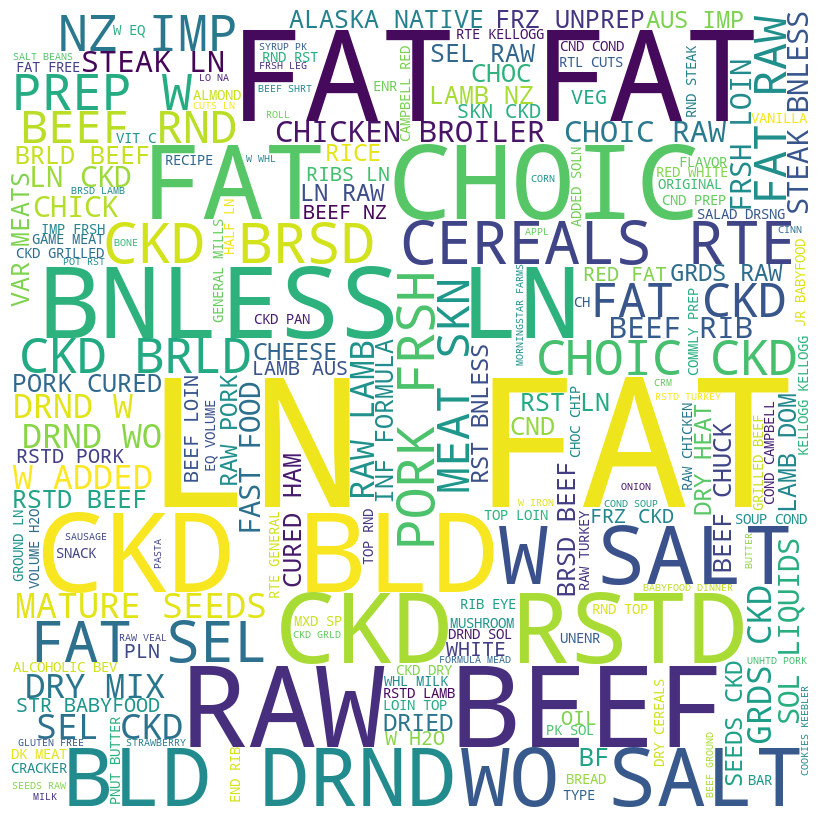

In [166]:
## Analyse de la description des produits
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concaténer toutes les chaînes de caractères dans la variable Shrt_Desc en une seule chaîne
text = ' '.join(df_miss['Shrt_Desc'])

# Générer le word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Afficher le word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

on obtiens un word cloud qui visualise la fréquence des mots dans les descriptions des produits. Les mots les plus fréquents apparaîtront plus grands, tandis que les mots moins fréquents seront plus petits. Cela permet d'obtenir rapidement une vue d'ensemble des termes les plus utilisés dans les descriptions.

## Analyse bivariées

In [167]:
# Relation entre les variables quantitatives

#sns.pairplot(df_miss)

# Vérifier si une variable contient des chaînes de caractères (str) dans le DataFrame
for column in df_miss.columns:
    contains_str = df_miss[column].apply(lambda x: isinstance(x, str)).any()
    if contains_str:
        print(f"La colonne '{column}' contient des valeurs de type 'str'.")
    else:
        print(f"La colonne '{column}' ne contient pas de valeurs de type 'str'.")


La colonne 'Shrt_Desc' contient des valeurs de type 'str'.
La colonne 'Energ_Kcal' ne contient pas de valeurs de type 'str'.
La colonne 'Protein_(g)' ne contient pas de valeurs de type 'str'.
La colonne 'Lipid_Tot_(g)' ne contient pas de valeurs de type 'str'.
La colonne 'Carbohydrt_(g)' ne contient pas de valeurs de type 'str'.
La colonne 'Fiber_TD_(g)' ne contient pas de valeurs de type 'str'.
La colonne 'Sugar_Tot_(g)' ne contient pas de valeurs de type 'str'.
La colonne 'Calcium_(mg)' ne contient pas de valeurs de type 'str'.
La colonne 'Iron_(mg)' ne contient pas de valeurs de type 'str'.
La colonne 'Magnesium_(mg)' ne contient pas de valeurs de type 'str'.
La colonne 'Phosphorus_(mg)' ne contient pas de valeurs de type 'str'.
La colonne 'Potassium_(mg)' ne contient pas de valeurs de type 'str'.
La colonne 'Sodium_(mg)' ne contient pas de valeurs de type 'str'.
La colonne 'Zinc_(mg)' ne contient pas de valeurs de type 'str'.
La colonne 'Vit_C_(mg)' ne contient pas de valeurs de ty

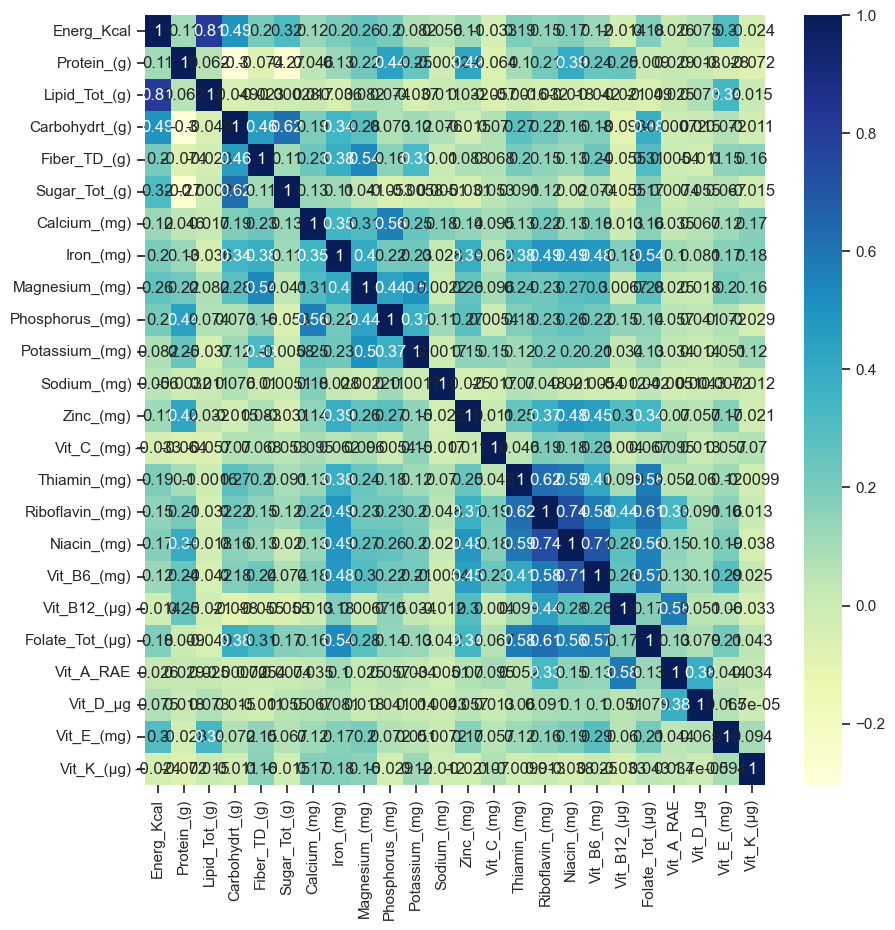

In [168]:
# Garder uniquement les colonnes numériques
#df_numeric = df_miss.select_dtypes(include=['float64', 'int64'])


# Sélectionner uniquement les colonnes numériques
df_numeric = df_numeric.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

# Et la heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

On a vu que les données ne suivent pas une distribution normal donc on va faire les matrices de corrélation de Spearman et Kendall

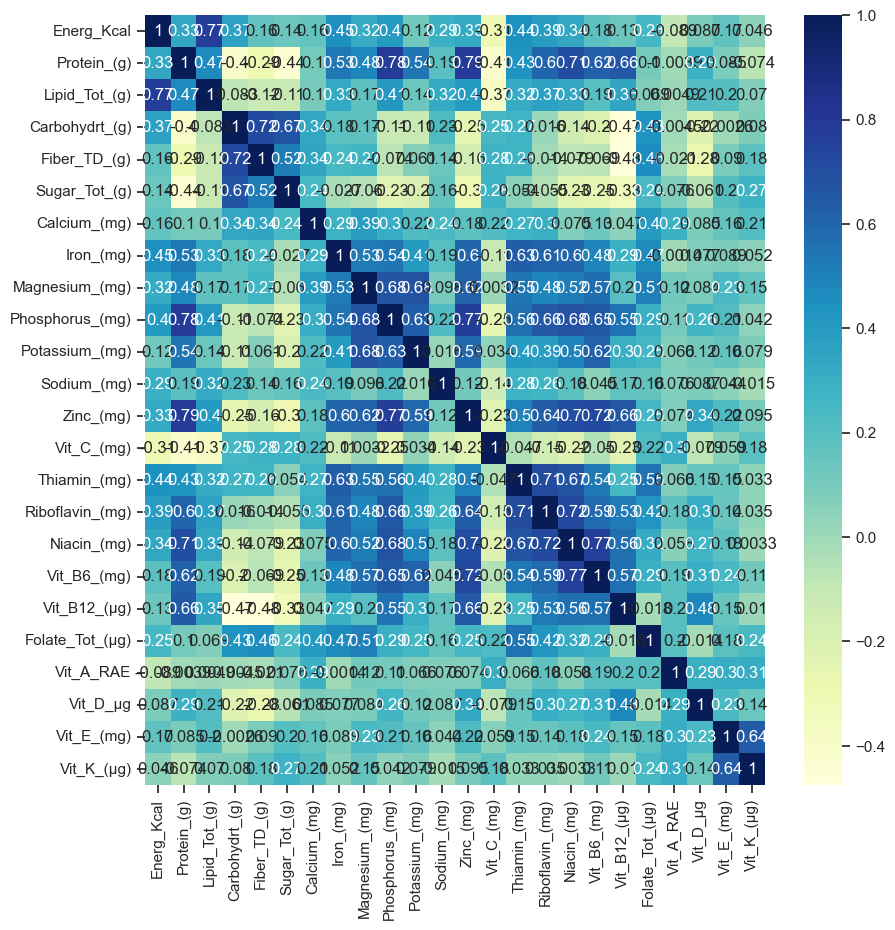

In [169]:
# Obtenir le tableau de corélation et la heatmap (corrélation de spearman)

corr_matrix = df_numeric.corr(method='spearman')

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

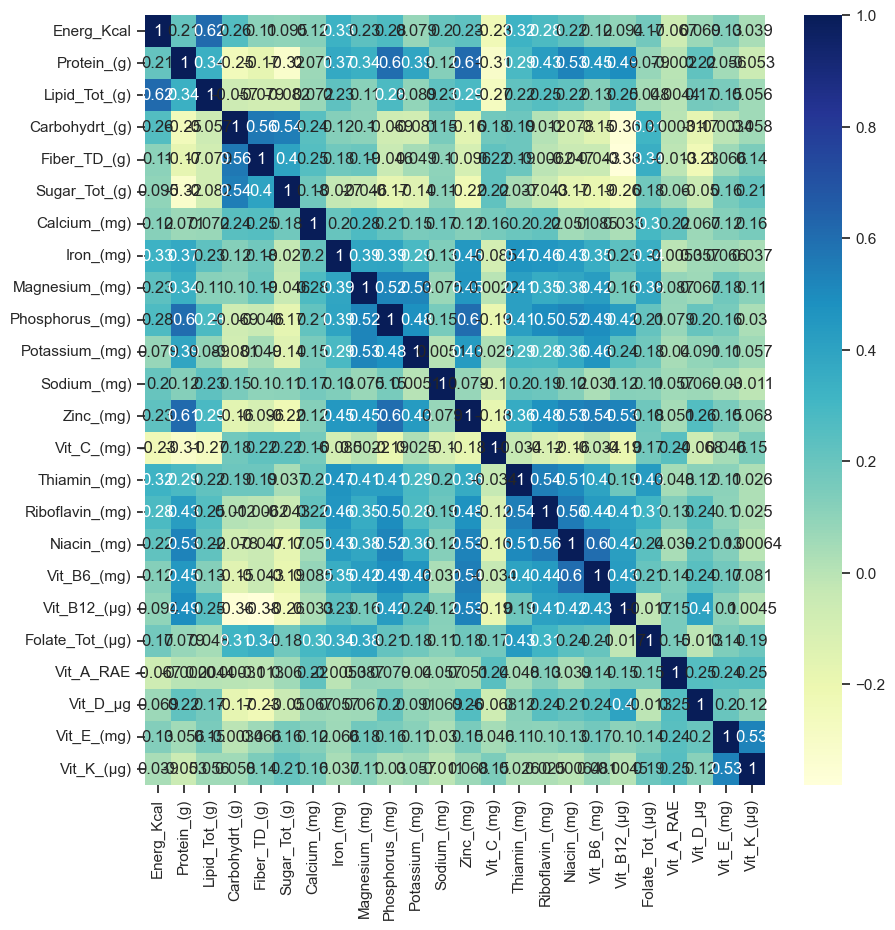

In [170]:
# Obtenir le tableau de corélation et la heatmap (corrélation de kendall)

corr_matrix = df_numeric.corr(method='kendall')

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

## Construction de l'ACP

In [171]:
df=df_miss
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 1001 to 93600
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Shrt_Desc        8790 non-null   object 
 1   Energ_Kcal       8790 non-null   int64  
 2   Protein_(g)      8790 non-null   float64
 3   Lipid_Tot_(g)    8790 non-null   float64
 4   Carbohydrt_(g)   8790 non-null   float64
 5   Fiber_TD_(g)     8790 non-null   float64
 6   Sugar_Tot_(g)    8790 non-null   float64
 7   Calcium_(mg)     8790 non-null   float64
 8   Iron_(mg)        8790 non-null   float64
 9   Magnesium_(mg)   8790 non-null   float64
 10  Phosphorus_(mg)  8790 non-null   float64
 11  Potassium_(mg)   8790 non-null   float64
 12  Sodium_(mg)      8790 non-null   float64
 13  Zinc_(mg)        8790 non-null   float64
 14  Vit_C_(mg)       8790 non-null   float64
 15  Thiamin_(mg)     8790 non-null   float64
 16  Riboflavin_(mg)  8790 non-null   float64
 17  Niacin_(mg)    

In [172]:
## Séparation des données en variables quantitative (X) et variable qualitative (Y)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [173]:
X

array([[7.1700e+02, 8.5000e-01, 8.1110e+01, ..., 3.0000e-03, 5.1368e+01,
        1.5870e+01],
       [7.1800e+02, 4.9000e-01, 7.8300e+01, ..., 8.0000e-03, 4.5390e+01,
        1.6720e+01],
       [8.7600e+02, 2.8000e-01, 9.9480e+01, ..., 1.0000e-03, 6.1924e+01,
        2.4000e-01],
       ...,
       [2.6900e+02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.6000e+01],
       [9.0000e+01, 1.6100e+01, 1.4000e+00, ..., 1.3000e-01, 3.6100e-01,
        7.9200e+01],
       [8.9000e+01, 1.9800e+01, 5.0000e-01, ..., 1.2000e-01, 1.2700e-01,
        7.8500e+01]])

Pour éviter l'effet taille, on normalise la variable

In [174]:
# Standardisation des données
# Normaliser les données
from sklearn.preprocessing import StandardScaler

# Créer un objet scaler de la classe StandardScaler
scaler = StandardScaler()

# Utiliser la méthode fit_transform() sur l'objet scaler pour normaliser les données
X_scaled = scaler.fit_transform(X)

In [175]:
# Réduction de dimension
from sklearn.decomposition import PCA

pca = PCA()
X_pca=pca.fit_transform(X_scaled)

In [176]:

p=len(vars_list)
p

20

## Aide à l'interprétation

In [177]:
# Analyse des valeurs propres
p=len(vars_list)
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(p)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0       Dim1       5.187291                  26.0                   26.0
1       Dim2       2.964855                  15.0                   41.0
2       Dim3       2.171656                  11.0                   52.0
3       Dim4       1.756530                   9.0                   60.0
4       Dim5       1.172734                   6.0                   66.0
5       Dim6       1.059452                   5.0                   72.0
6       Dim7       0.904895                   5.0                   76.0
7       Dim8       0.824355                   4.0                   80.0
8       Dim9       0.742183                   4.0                   84.0
9      Dim10       0.565198                   3.0                   87.0
10     Dim11       0.485101                   2.0                   89.0
11     Dim12       0.458422                   2.0                   91.0
12     Dim13       0.378040                   2.0                   93.0
13     Dim14       0.362642                   2.0                   95.0
14     Dim15       0.294300                   1.0                   97.0
15     Dim16       0.259270                   1.0                   98.0
16     Dim17       0.227958                   1.0                   99.0
17     Dim18       0.181742                   1.0                  100.0
18     Dim19       0.003797                   0.0                  100.0
19     Dim20       0.001855                   0.0                  100.0

Text(3.25, 26, '25%')

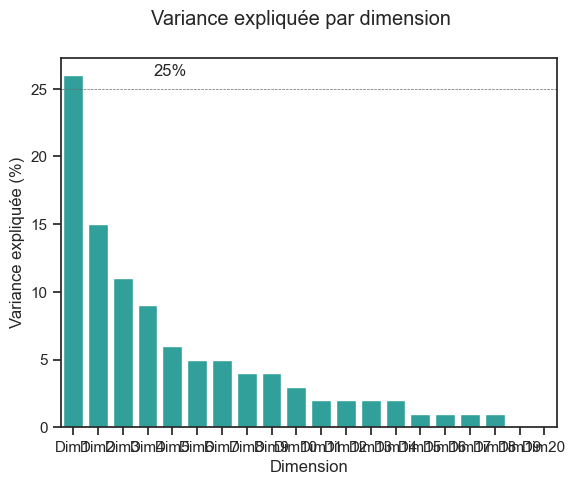

In [178]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

In [179]:

# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df_miss.columns[1:]

print(df_cos_squared)

                      PC1       PC2       PC3       PC4       PC5       PC6  \
Energ_Kcal       0.062630  0.018904  0.009236  0.056862  0.047932  0.014497   
Protein_(g)      0.194764  0.031785  0.173280  0.049858  0.000875  0.052486   
Lipid_Tot_(g)    0.021325  0.195049  0.136320  0.197801  0.070305  0.128215   
Carbohydrt_(g)   0.004593  0.011929  0.003505  0.002087  0.067028  0.021793   
Fiber_TD_(g)     0.001806  0.000001  0.008627  0.000800  0.085658  0.010988   
Sugar_Tot_(g)    0.000539  0.032147  0.014906  0.013779  0.017297  0.000001   
Calcium_(mg)     0.000017  0.028649  0.022855  0.010271  0.135660  0.258050   
Iron_(mg)        0.007347  0.155161  0.020533  0.022118  0.024814  0.028829   
Magnesium_(mg)   0.000025  0.001088  0.000199  0.000079  0.020493  0.000700   
Phosphorus_(mg)  0.013468  0.046083  0.001190  0.022878  0.037361  0.084213   
Potassium_(mg)   0.005511  0.050051  0.000759  0.002811  0.004084  0.021142   
Sodium_(mg)      0.005880  0.029029  0.001834  0.006

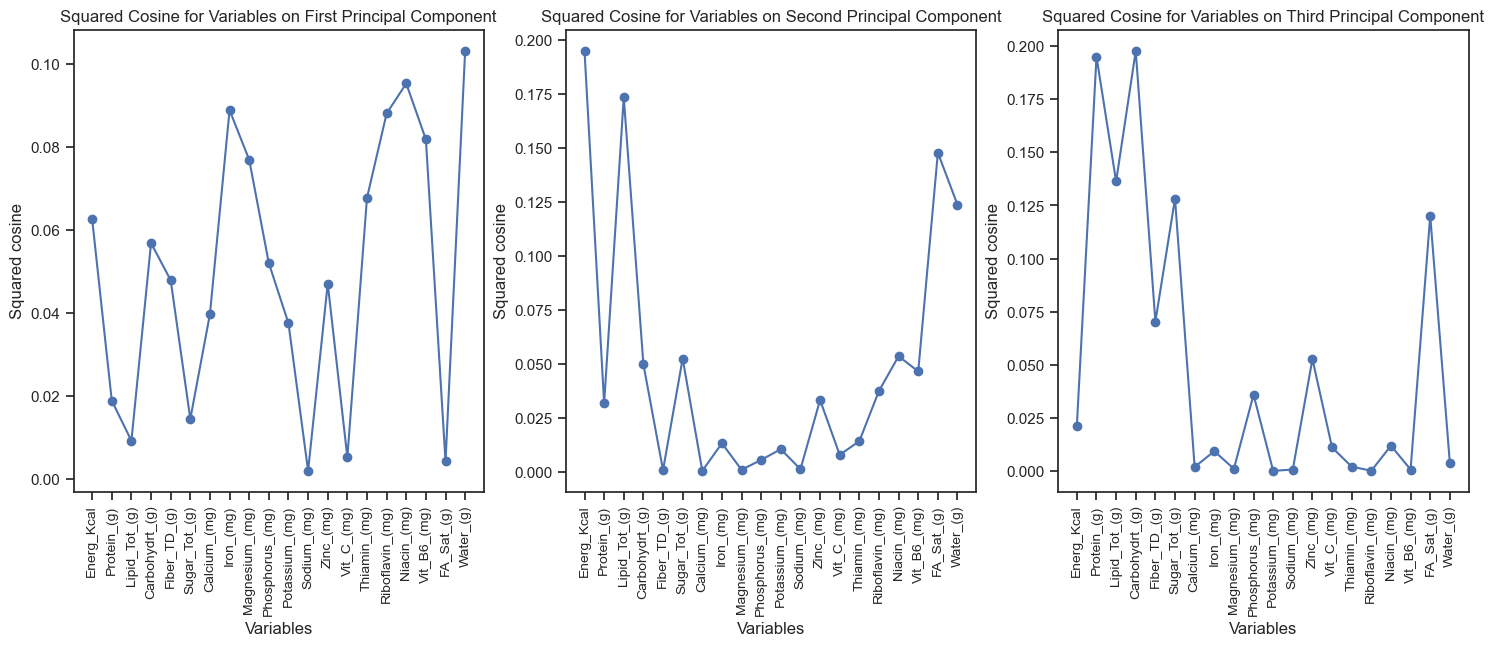

In [180]:
# Calculer les carrés des cosinus des variables sur les axes principaux
cos2 = pca.components_ ** 2
row_sums = cos2.sum(axis=1)
cos2 = cos2 / row_sums[:, np.newaxis]

# Afficher les graphiques des carrés des cosinus des variables sur les axes principaux pour le premier, le deuxième et le troisième axe principal
n_comp = pca.n_components_
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].plot(range(1, len(vars_list)+1), cos2[0,:], '-o')
axs[0].set_xticks(range(1, len(vars_list)+1))
axs[0].set_xticklabels(vars_list, rotation=90, fontsize=10)
axs[0].set_xlabel("Variables")
axs[0].set_ylabel("Squared cosine")
axs[0].set_title("Squared Cosine for Variables on First Principal Component")
axs[1].plot(range(1, len(vars_list)+1), cos2[1,:], '-o')
axs[1].set_xticks(range(1, len(vars_list)+1))
axs[1].set_xticklabels(vars_list, rotation=90, fontsize=10)
axs[1].set_xlabel("Variables")
axs[1].set_ylabel("Squared cosine")
axs[1].set_title("Squared Cosine for Variables on Second Principal Component")
axs[2].plot(range(1, len(vars_list)+1), cos2[2,:], '-o')
axs[2].set_xticks(range(1, len(vars_list)+1))
axs[2].set_xticklabels(vars_list, rotation=90, fontsize=10)
axs[2].set_xlabel("Variables")
axs[2].set_ylabel("Squared cosine")
axs[2].set_title("Squared Cosine for Variables on Third Principal Component")
plt.show()

In [181]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=df.columns[1:]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues


# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

                 PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  \
Energ_Kcal          0.324878     0.577446     0.046310     0.008067   
Protein_(g)         0.098062     0.094237     0.423578     0.020954   
Lipid_Tot_(g)       0.047912     0.513750     0.296040     0.006156   
Carbohydrt_(g)      0.294961     0.147821     0.429555     0.003666   
Fiber_TD_(g)        0.248638     0.002595     0.152679     0.117737   
Sugar_Tot_(g)       0.075198     0.155612     0.278438     0.038280   
Calcium_(mg)        0.206275     0.001618     0.004015     0.207840   
Iron_(mg)           0.461085     0.039512     0.020158     0.002229   
Magnesium_(mg)      0.399061     0.003105     0.002186     0.227154   
Phosphorus_(mg)     0.269876     0.016666     0.078009     0.276492   
Potassium_(mg)      0.194826     0.031377     0.000053     0.266018   
Sodium_(mg)         0.010347     0.003937     0.001438     0.012156   
Zinc_(mg)           0.244378     0.098727     0.114415     0.013471   
Vit_C_

In [182]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

                 PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  \
Energ_Kcal          6.262961    19.476372     2.132489     0.459275   
Protein_(g)         1.890420     3.178477    19.504854     1.192926   
Lipid_Tot_(g)       0.923643    17.328000    13.631993     0.350456   
Carbohydrt_(g)      5.686222     4.985780    19.780076     0.208731   
Fiber_TD_(g)        4.793225     0.087527     7.030534     6.702828   
Sugar_Tot_(g)       1.449661     5.248553    12.821470     2.179321   
Calcium_(mg)        3.976543     0.054571     0.184876    11.832424   
Iron_(mg)           8.888743     1.332680     0.928243     0.126915   
Magnesium_(mg)      7.693050     0.104743     0.100645    12.931970   
Phosphorus_(mg)     5.202646     0.562122     3.592126    15.740783   
Potassium_(mg)      3.755843     1.058288     0.002457    15.144514   
Sodium_(mg)         0.199478     0.132774     0.066214     0.692064   
Zinc_(mg)           4.711086     3.329900     5.268577     0.766913   
Vit_C_

## Représentation des individus

In [183]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

      PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
0        0.000091     0.190377     0.108381     0.011981     0.002566   
1        0.000056     0.167877     0.088130     0.010833     0.002381   
2        0.001032     0.295223     0.165942     0.020610     0.014917   
3        0.001354     0.008179     0.033567     0.009119     0.028420   
4        0.001571     0.009852     0.036837     0.015208     0.029125   
...           ...          ...          ...          ...          ...   
8785     0.000536     0.001513     0.012069     0.006762     0.071572   
8786     0.001942     0.004237     0.002742     0.009912     0.003188   
8787     0.000002     0.019235     0.071033     0.009460     0.003388   
8788     0.000004     0.006902     0.000435     0.031168     0.011757   
8789     0.003659     0.005829     0.001199     0.002044     0.000427   

      PC6_contrib  PC7_contrib  PC8_contrib  PC9_contrib  PC10_contrib  \
0        0.037841     0.028097     0.056569     0

In [184]:
# 1. Mettre les coordonnées dans un DataFrame
coord_df = pd.DataFrame(X_pca, index=df.index, columns=[f'Axe{i+1}' for i in range(X_pca.shape[1])])

# 2. Calcul de la norme au carré pour chaque individu
norm_squared = (coord_df ** 2).sum(axis=1)

# 3. Calcul du cos²
cos2 = (coord_df ** 2).div(norm_squared, axis=0)

# Résultats
print("\nCoordonnées des individus sur les axes :")
print(coord_df)

print("\nQualité de représentation des individus (cos²) :")
print(cos2)


Coordonnées des individus sur les axes :
            Axe1      Axe2      Axe3      Axe4      Axe5      Axe6      Axe7  \
NDB_No                                                                         
1001   -0.203461  7.043740 -4.548479 -1.360102 -0.514348  1.877224 -1.494944   
1002   -0.160094  6.614411 -4.101580 -1.293288 -0.495415  1.700211 -1.407497   
1003   -0.685845  8.771449 -5.628186 -1.783871 -1.240059  2.134166 -1.433446   
1004   -0.785760  1.459976 -2.531326  1.186586  1.711625  1.087983  0.354951   
1005   -0.846373  1.602336 -2.651739  1.532350  1.732703  1.086836  0.951188   
...          ...       ...       ...       ...       ...       ...       ...   
83110  -0.494243  0.627946 -1.517849  1.021753  2.716217  0.817501 -2.290565   
90240   0.941053 -1.050768 -0.723538  1.237121  0.573287 -0.194715  0.299403   
90480   0.026628  2.238953  3.682302 -1.208549  0.590954 -0.531131  2.674720   
90560   0.042084 -1.341146 -0.288080  2.193708 -1.100908 -0.404739 -0.380230  

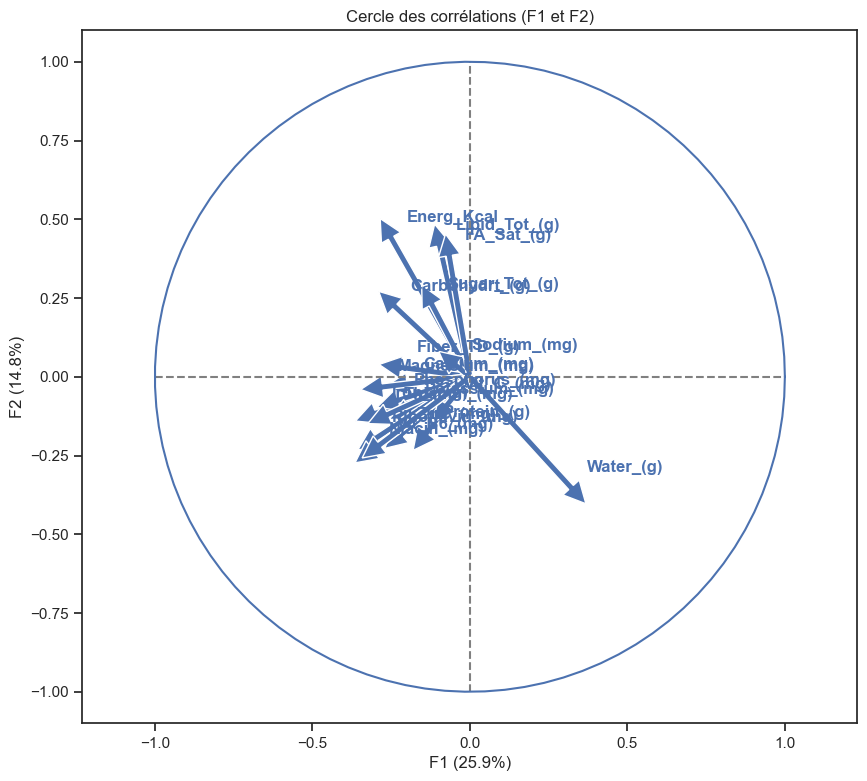

In [185]:
#fonction qui permet de tracer le graphes de corrélations selon les plans choisis
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i], fontsize=12, weight='bold',color='b')
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du graphe
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.savefig('CorrGraph_{}.jpg'.format(x_y), bbox_inches='tight')
    plt.show(block=False)
#pour F1 et F2
x_y = (0,1)
x_y
correlation_graph(pca, x_y, vars_list)

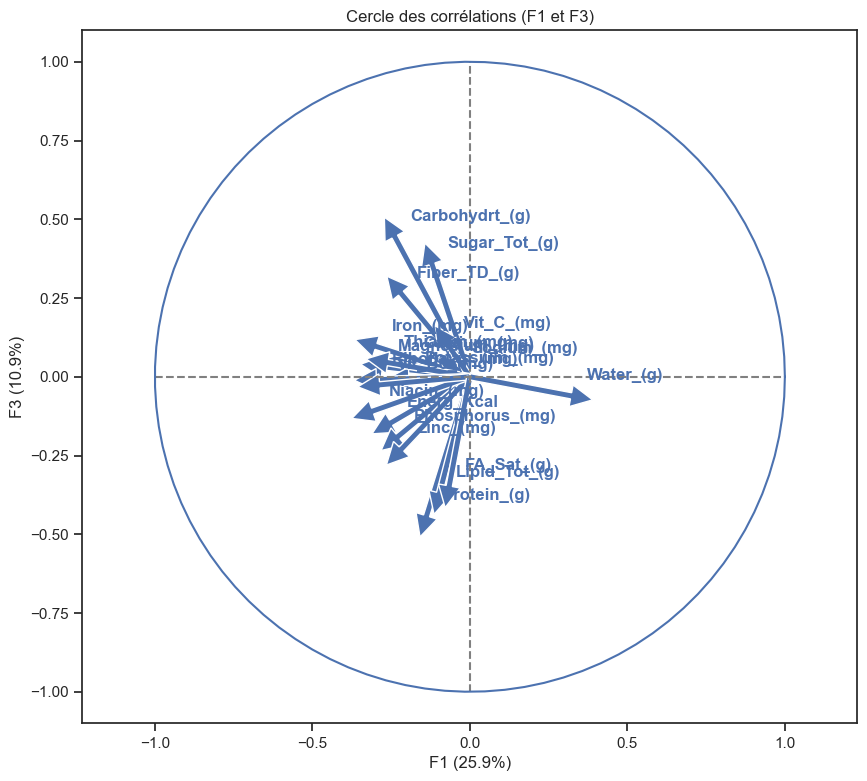

In [187]:
#pour F2 et F3
x_y = (0,2)
x_y
correlation_graph(pca, x_y, vars_list)

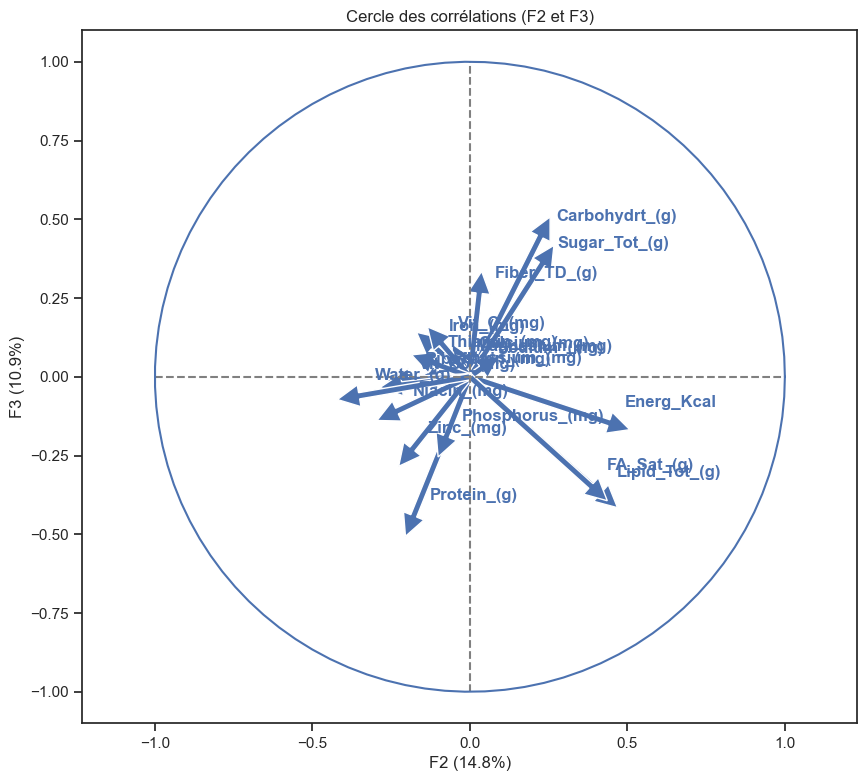

In [188]:
#pour F2 et F3
x_y = (1,2)
x_y
correlation_graph(pca, x_y, vars_list)

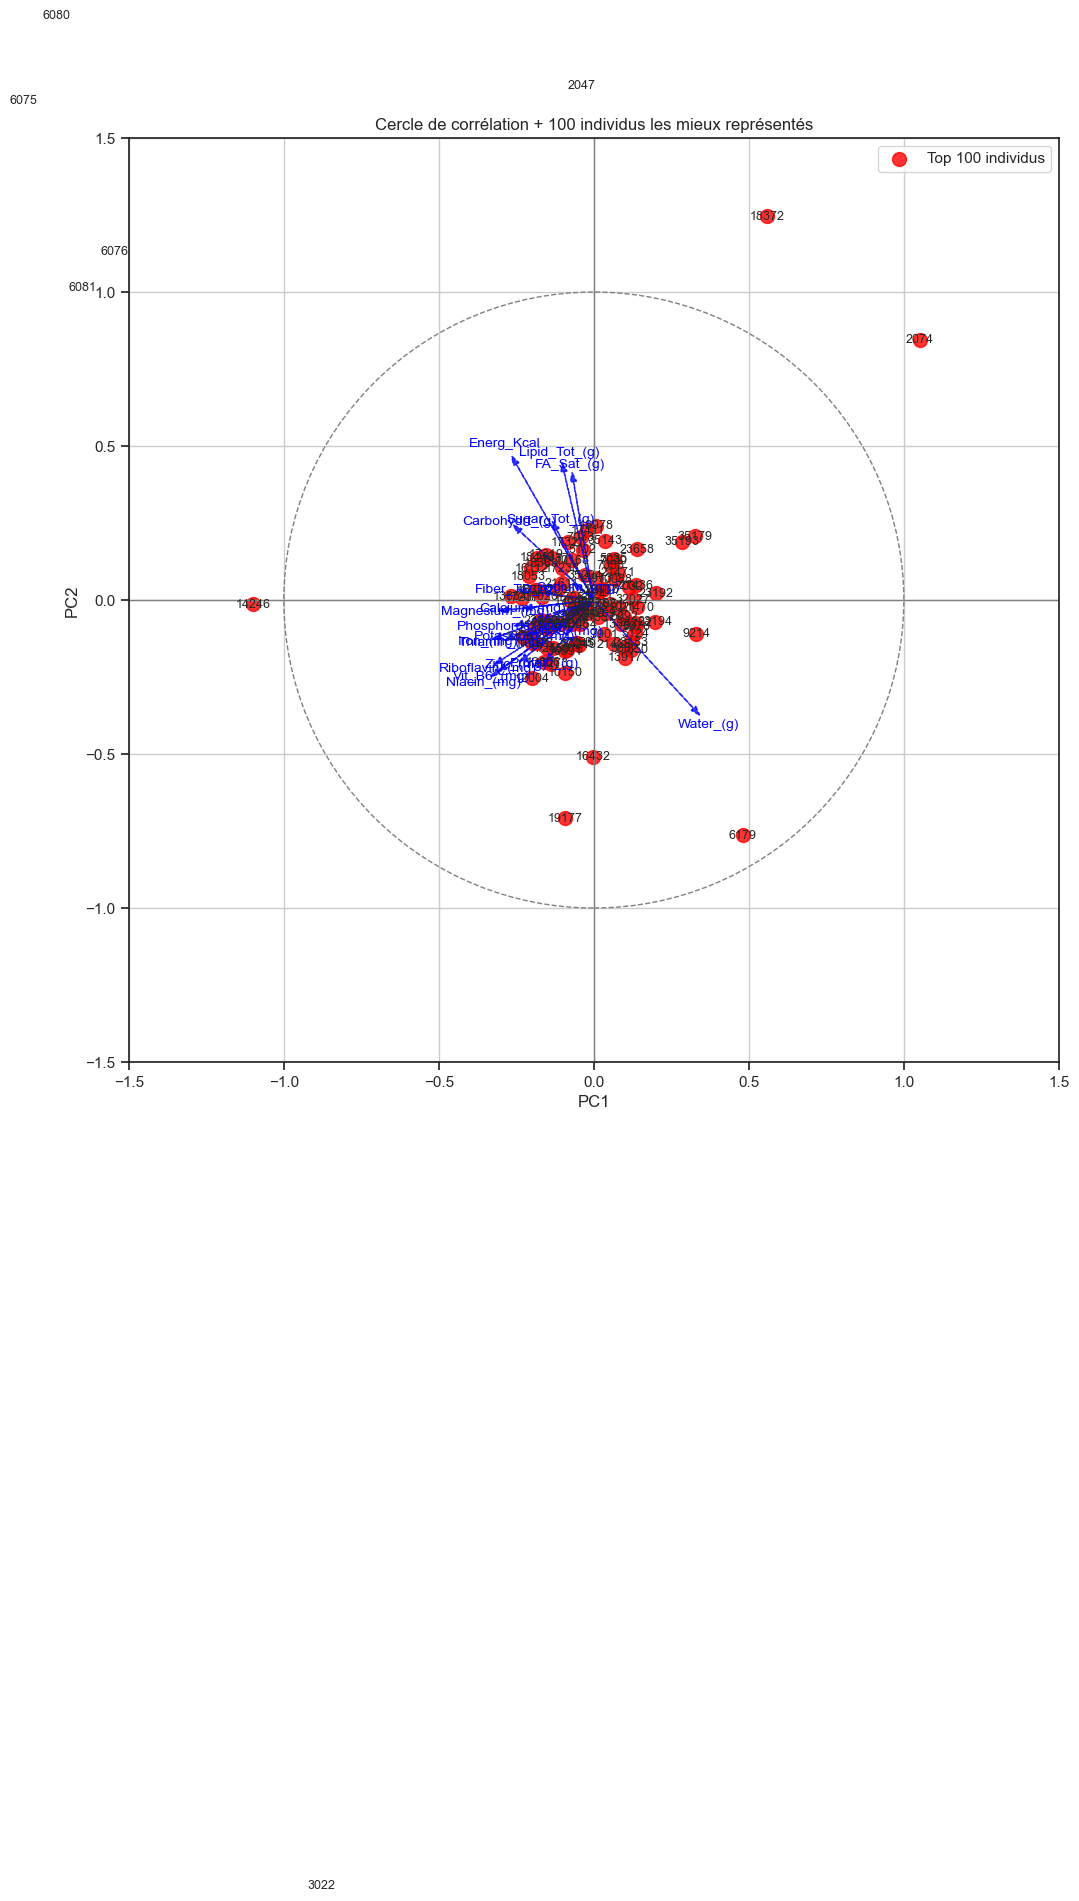

In [197]:

# 1. Coordonnées des individus sur les axes principaux
coord_df = pd.DataFrame(X_pca, index=df.index, columns=[f'Axe{i+1}' for i in range(X_pca.shape[1])])

# 2. Norme au carré pour chaque individu
norm_squared = (coord_df ** 2).sum(axis=1)

# 3. Calcul du cos² (qualité de représentation)
cos2 = (coord_df ** 2).div(norm_squared, axis=0)

# 4. Sélection des 100 individus les moins bien représentés sur les deux premiers axes (somme des cos² sur PC1 et PC2)
#    car les les 100 premiers les mieux représentés sortent du plan factoriel
cos2_sum = cos2[['Axe1', 'Axe2']].sum(axis=1)
top10_indices = cos2_sum.sort_values(ascending=True).head(100).index

# 5. Coordonnées des vecteurs des variables sur les deux premiers axes
coeff = np.transpose(pca.components_[0:2, :])  # On prend PC1 et PC2
n = coeff.shape[0]

# 6. Création de la figure
fig, ax = plt.subplots(figsize=(12, 12))

# 7. Représentation des 10 meilleurs individus
plt.scatter(coord_df.loc[top10_indices, 'Axe1'], coord_df.loc[top10_indices, 'Axe2'],
            color='red', alpha=0.8, s=100, label='Top 100 individus')

# 8. Annoter les individus
for idx in top10_indices:
    plt.text(coord_df.loc[idx, 'Axe1'], coord_df.loc[idx, 'Axe2'], str(idx),
             fontsize=9, ha='center', va='center')

# 9. Représentation des variables (vecteurs)
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1],
              color='blue', alpha=0.8, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, vars_list[i],
             color='blue', ha='center', va='center', fontsize=10)

# 10. Cercle de corrélation
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)

# 11. Ajustements
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation + 100 individus les mieux représentés')

plt.legend()
plt.grid(True)
plt.show()